## **Оглавление:**
- [Шаг 1. Откроем файл с данными и изучим общую информацию](#id-section1) <a class='anchor' id='id-section28'/>
- [Вывод](#id-section2) <a class='anchor' id='id-section29'/>



- [Шаг 2. Подготовим данные к анализу](#id-section3) <a class='anchor' id='id-section30'/>
- [Изменим тип данных](#id-section4) <a class='anchor' id='id-section31'/>
- [Обработаем дубликаты](#id-section5) <a class='anchor' id='id-section32'/>
- [Добавим столбец с выручкой](#id-section6) <a class='anchor' id='id-section33'/>
- [Вывод](#id-section7) <a class='anchor' id='id-section34'/>


- [Шаг 3. Проведем исследовательский анализ данных (EDA)](#id-section8) <a class='anchor' id='id-section35'/>
- [Изучим средние значения и стандартные отклонения по признакам](#id-section9) <a class='anchor' id='id-section36'/>
- [Построим гистограммы распределения признаков](#id-section10) <a class='anchor' id='id-section37'/>
- [Удалим выбросы из данных](#id-section11) <a class='anchor' id='id-section38'/>
- [Построим матрицу корреляций](#id-section12) <a class='anchor' id='id-section39'/>
- [Вывод](#id-section13) <a class='anchor' id='id-section40'/>


- [Шаг 4. Проведем сегментацию покупателей](#id-section14) <a class='anchor' id='id-section41'/>
- [Выделим категории товаров для сегментации покупателей](#id-section15) <a class='anchor' id='id-section42'/>
- [Выделим сегменты покупателей по дням недели совершения покупок](#id-section16) <a class='anchor' id='id-section43'/>
- [Выделим сегменты покупателей с помощью машинного обучения (алгоритм кластеризации)](#id-section101) <a class='anchor' id='id-section102'/>
- [Посмотрим на средние значения признаков для сегментов](#id-section17) <a class='anchor' id='id-section44'/>
- [Построим распределения признаков для сегментов](#id-section18) <a class='anchor' id='id-section45'/>
- [Вывод](#id-section19) <a class='anchor' id='id-section46'/>


- [Шаг 5. Проверим статистические гипотезы](#id-section20) <a class='anchor' id='id-section47'/>
- [Гипотеза о равенстве среднего чека у покупателей товаров "Для дома и сада" в зимний и летний сезоны](#id-section21) <a class='anchor' id='id-section48'/>
- [Вывод](#id-section22) <a class='anchor' id='id-section49'/>
- [Гипотеза о равенстве среднего чека у покупателей по будним и выходным дням](#id-section23) <a class='anchor' id='id-section50'/>
- [Вывод](#id-section24) <a class='anchor' id='id-section51'/>
- [Гипотеза о равенстве среднего чека у покупателей в каждой паре из трех кластеров](#id-section103) <a class='anchor' id='id-section104'/>
- [Вывод](#id-section105) <a class='anchor' id='id-section106'/>



- [Шаг 6. Сформулируем общие выводы и рекомендации по разработке персонализированных предложений для покупателей](#id-section25) <a class='anchor' id='id-section52'/>


- [Шаг 7. Презентация](#id-section26) <a class='anchor' id='id-section53'/>


- [Шаг 8. Дашборд](#id-section27) <a class='anchor' id='id-section54'/>




<a class='anchor' id='id-section1'/>

## [Шаг 1. Откроем файл с данными и изучим общую информацию](#id-section28)

Импортируем необходимые библиотеки.

Применим метод `head(10)`, чтобы вывести на экран 10 строк из таблицы.

Также сразу посмотрим, какие типы данных хранятся в таблице, воспользуемся методом `info()`.

In [234]:
from IPython.display import display
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
! pip install imblearn
! pip install delayed
from imblearn.pipeline import Pipeline

import numpy as np
from scipy import stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariasto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [235]:
try:
    df = pd.read_csv('/datasets/ecommerce_dataset.csv')
except:
    df = pd.read_csv('ecommerce_dataset.csv')

display(df.head(10))
df.info()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


<a class='anchor' id='id-section2'/>

### [Вывод](#id-section29)

Таблица `df` - массив данных, в котором хранится 6.7 тыс. строк. 

Пропущенных значений в таблице нет. 

Названия переменных удобны для работы.

- Категориальные переменные `customer_id` и `product` имеют тип данных `object` - это корректно (так как идентификатор покупателя содержит числа и буквы, а наименование товара представлено через словесное описание и размерную характеристику).
- Категориальная переменная `order_id` с типом данных `int64` - корретно (так как в идентификаторе заказа используются только числа).
- Количественные переменные `quantity` (количество товара) и `price` (цена товара) с типами данных `int64` и `float64` - корректно.
- Переменная `date` (дата заказа) явно должна иметь тип `datetime` вместо `int64`. 

Мы можем сделать заключение, что для дальнейшей работы менять тип данных требуется только в переменной `date`. 

<a class='anchor' id='id-section3'/>

## [Шаг 2. Подготовим данные к анализу](#id-section30)

<a class='anchor' id='id-section4'/>

### [Изменим тип данных](#id-section31)

Воспользуемся методом `datetime.strptime()`, который применим к каждому строковому значению в столбце `date`. + Выполним проверку. 

In [236]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d%H'))

df.info()

display(df.sample(5, random_state = 0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 315.9+ KB


,date,customer_id,order_id,product,quantity,price
3302,2019-04-29 13:00:00,603e92a4-fc7f-4203-9ca5-103da5b008ac,14705,Рассада Остеоспермум крупноцветковый Purple ма...,1,127.0
4315,2019-06-02 16:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0
1580,2019-01-23 14:00:00,8fa1ee5d-7955-4ad6-8ce0-fd27033e991a,69944,Емкость для соуса с ложкой PASABAHCE 200 мл OT...,15,101.0
4086,2019-05-28 18:00:00,63d48b37-11ca-46ec-b858-26cc165f7629,14825,Петуния простая рассада однолетних цветов в ка...,2,128.0
3896,2019-05-17 18:00:00,b6095dc9-1580-4d1f-8ba3-a554a8dab3bd,14789,Рассада Дыни сорт Колхозница горшок 9х9 см P-9,4,38.0


<a class='anchor' id='id-section5'/>

### [Обработаем дубликаты](#id-section32)

Поищем **полные** дубликаты в таблице методом `duplicated().sum()`, что позволит нам посчитать общее количество дубликатов. 

In [237]:
display(df.duplicated().sum())

0

Удалим из таблицы столбец с датой и временем и посмотрим, встречаются ли **дубликаты в таком случае**. Также посчитаем, сколько % от общего числа данных составляют такие дубликаты.

In [238]:
df1 = df.drop('date', axis = 1)

display(df1.duplicated().sum())

display(df1.duplicated().sum() / df.shape[0])

1864

0.27668101528870415

- Дубликатов нашлось очень много (27% от общего числа данных).
---

Посмотрим, как распределены найденные дубликаты на основых данных (с учетом даты и времени), используем метод `loc`.

In [239]:
display(df.loc[df1.duplicated()])

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0
...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,Мирт d-9 см h-15 см,1,134.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


- Мы видим, что покупатель делает заказ, и далее этот заказ еще несколько раз отображается в системе в разное время. 
- Можно предположить, что изначально данные были выгружены с учетом того, чтобы дать нам всю историю движения каждого заказа во времени (например, не только запись о том, когда покупатель оформил заказ, но и о том, когда банком был подтвержден платеж по заказу, когда заказ был передан в службу доставки, движение заказа в центре обработки доставок и т.д. - то есть вся информация по заказу, которая хранится в системе). 
- Мы считаем, что несмотря на то, что такие дублированные данные составляют 27% от общего числа данных, для дальнейшей работы нам лучше **удалить их.**

In [240]:
# меняем для дубликатов условие True на False. Теперь True только там, где дубликатов нет
not_duplicates = df1.duplicated().apply(lambda x: not x)

# оставляем в исходном датасете только те строки, которые попали под условие True 
# (накладываем Series not_duplicates без дубликатов)
df = df.loc[not_duplicates]

display(df)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0


<a class='anchor' id='id-section6'/>

### [Добавим столбец с выручкой](#id-section33)

Добавим в датафрейм столбец с выручкой, умножив количество товара на цену.

In [241]:
df['revenue'] = df['quantity'] * df['price']

<a class='anchor' id='id-section7'/>

### [Вывод](#id-section34)

На данном этапе мы:
- изменили тип данных в столбце `date` на `datetime`;
- проверили, что полные дубликаты в таблице отсутствуют;
- убрали из таблицы неполные дубликаты (27% от общего числа данных - но это одни и те же заказанные товары, которые  несколько раз отображаются в системе в разное время, то есть история движения каждого заказа во времени);
- добавили в датафрейм столбец `revenue` с выручкой.

<a class='anchor' id='id-section8'/>

## [Шаг 3. Проведем исследовательский анализ данных (EDA)](#id-section35)

<a class='anchor' id='id-section9'/>

### [Изучим средние значения и стандартные отклонения по признакам](#id-section36)

На ***Шаге 1.*** мы уже убедились, что в датасете нет пропущенных значений.

Вызовем метод `describe()` и изучим средние значения и стандартные отклонения по всем количественным переменным, а также по переменной с датой и временем.

In [242]:
display(df.drop(['date', 'customer_id', 'order_id', 'product'], axis = 1).describe(),\
       df['date'].describe())

,quantity,price,revenue
count,4873.000000,4873.000000,4873.000000
mean,2.837472,514.749846,850.021342
std,17.606813,944.455480,9807.308006
min,1.000000,9.000000,9.000000
25%,1.000000,90.000000,120.000000
50%,1.000000,150.000000,194.000000
75%,1.000000,488.000000,734.000000
max,1000.000000,14917.000000,675000.000000


count                    4873
unique                   2230
top       2019-04-27 16:00:00
freq                       51
first     2018-10-01 00:00:00
last      2019-10-31 14:00:00
Name: date, dtype: object

In [243]:
# посмотрим на строку в данных, где цена (price) = максимальной (14917 руб.)
display(df.query('price == 14917'))

,date,customer_id,order_id,product,quantity,price,revenue
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0,14917.0


- Судя по тому, что 75-й перцентиль в переменной **`quantity`** равен 1, в подавляющем большинстве случаев покупатели приобретают товары поштучно.

- При этом максимальное значение переменной `quantity`, встречающееся в данных, равно 1000. Это похоже на выброс, так как крайне маловероятно, что какой-то товар вдруг купили в количестве 1000 штук.

- Из-за наличия выбросов среднее значение (`mean`) для переменной `quantity` может быть искусственно смещено в бОльшую сторону, и мы сейчас не видим реальной картины.
- - - 

- О **цене** товаров (`price`) мы можем сказать, что в большинстве случаев цена товара укладывается в 500 р. (75-й перцентиль в переменной price равен 488 р.). 

- Средняя цена товара (`mean`) тоже равна примерно 500 р. 

- Максимальная цена товара равна 14 917 р., что довольно много по сравнению с другими ценами. Но мы проверили, что это точно не выброс: методом `query()` мы нашли строку в данных с этой ценой, там оказалась "Сушилка уличная Leifheit 85210 LINOMATIC V 400". На одном сайте (https://sewtime.ru/catalog/ironing_equipment_and_cleaning_the_house/leifheit_clothes_dryers_the_bathroom/clothes_dryer_leifheit_linomatic_v_400_85210/) такая сушилка стоит 24 860 р., а на другом (https://www.cezon.ru/item/sushka-ulichnaya-leifheit-linomatic-v-400-art-85210.html) - 10 100 р. Так что нашу цену 14 917 р. можно считать реальной.
- - - 

- Покупатели в основном приносят нам до 734 р. **прибыли** (75-й перцентиль в переменной `revenue`).

- Максимальная прибыль равна 675 000 р., что явно похоже на выброс. Его возникновение связано с выбросом в переменной `quantity`. 

- Если очистить переменную `quantity` от выбросов, то данные по `revenue` станут более естественными (так как `revenue` - это производная переменная от цены и количества товара). 
- - - 

- По переменной **`date`** можно сказать, что мы располагаем данными за год: с 1 октября 2018 г. по 31 октября 2019 г.

<a class='anchor' id='id-section10'/>

### [Построим гистограммы распределения признаков](#id-section37)

Используем метод `hist()`. 

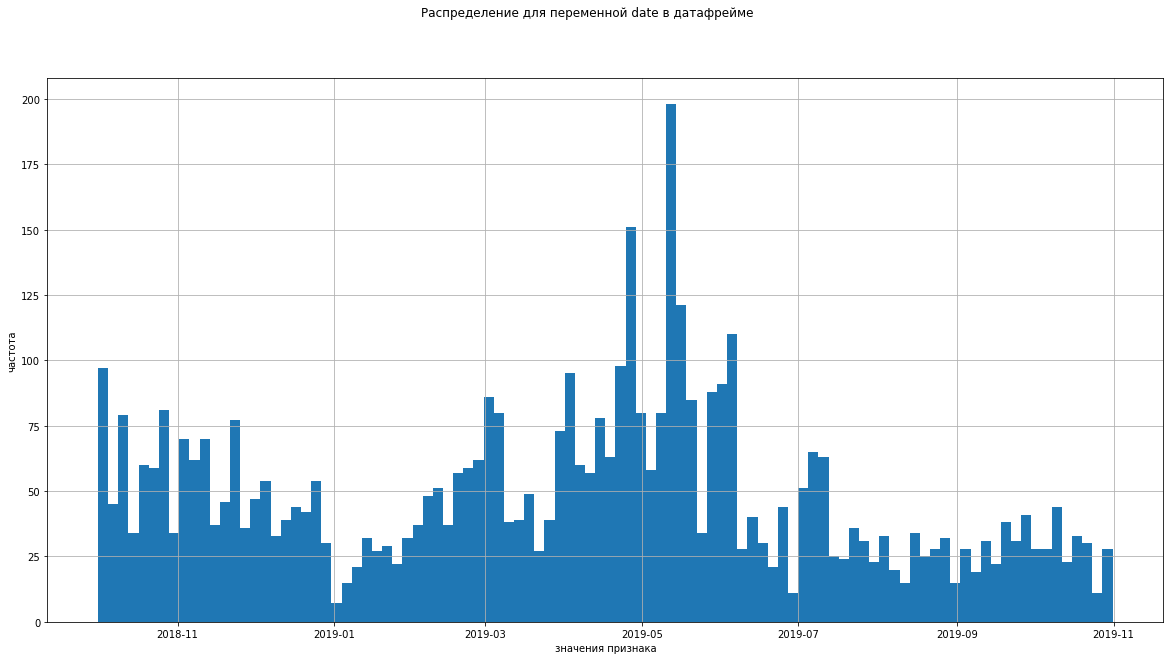

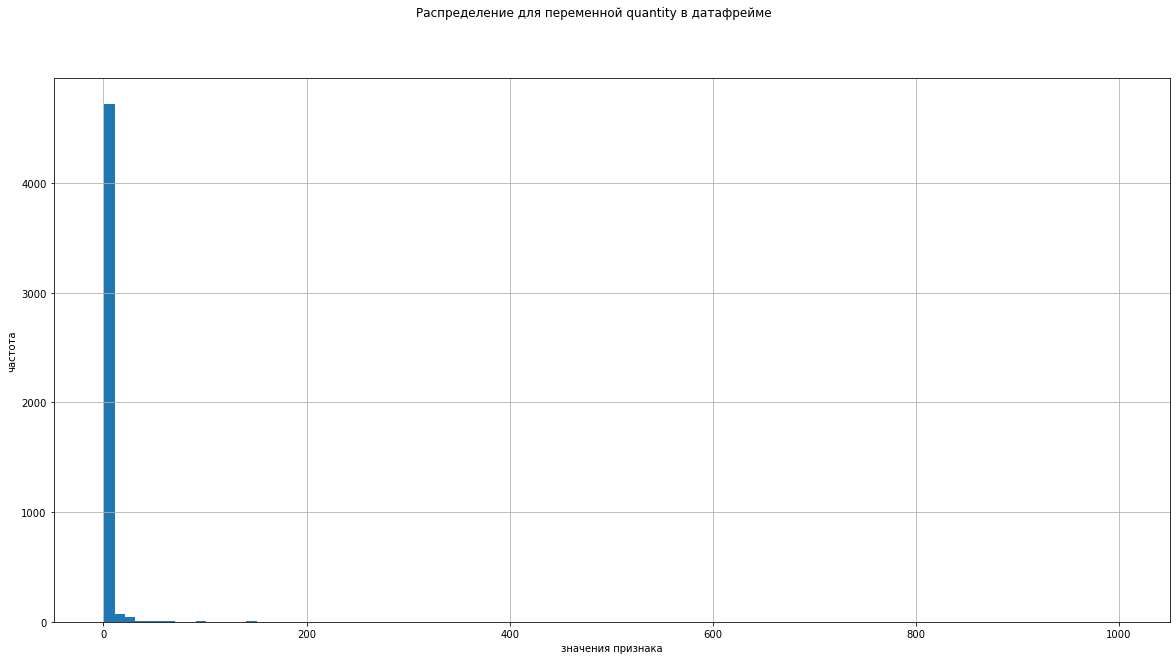

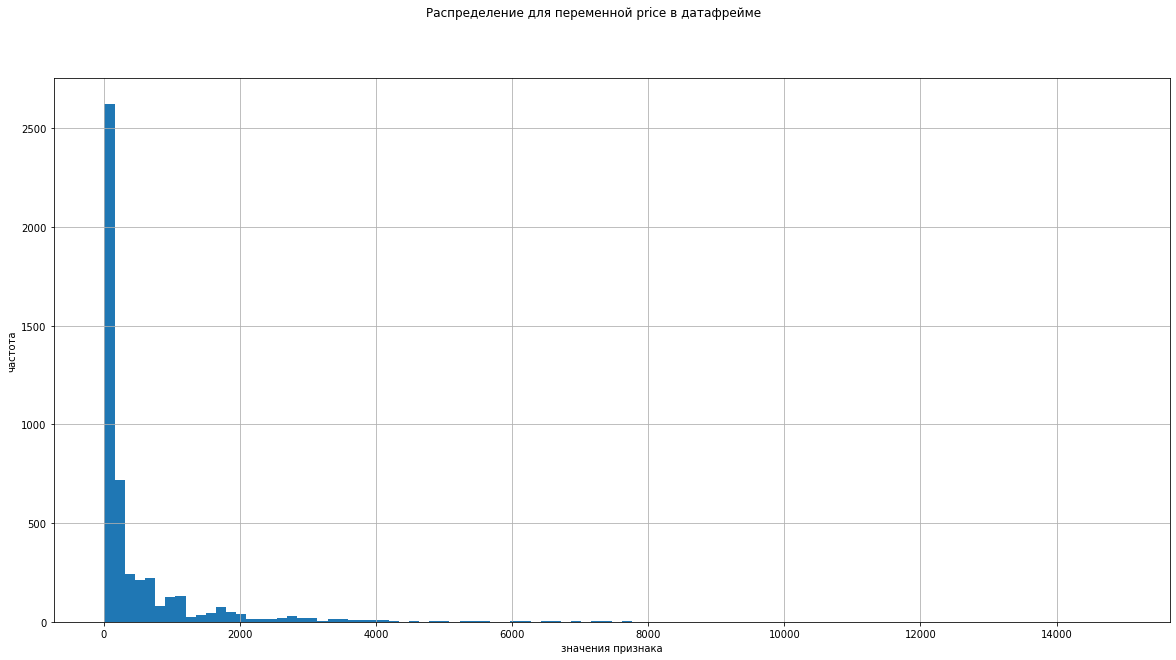

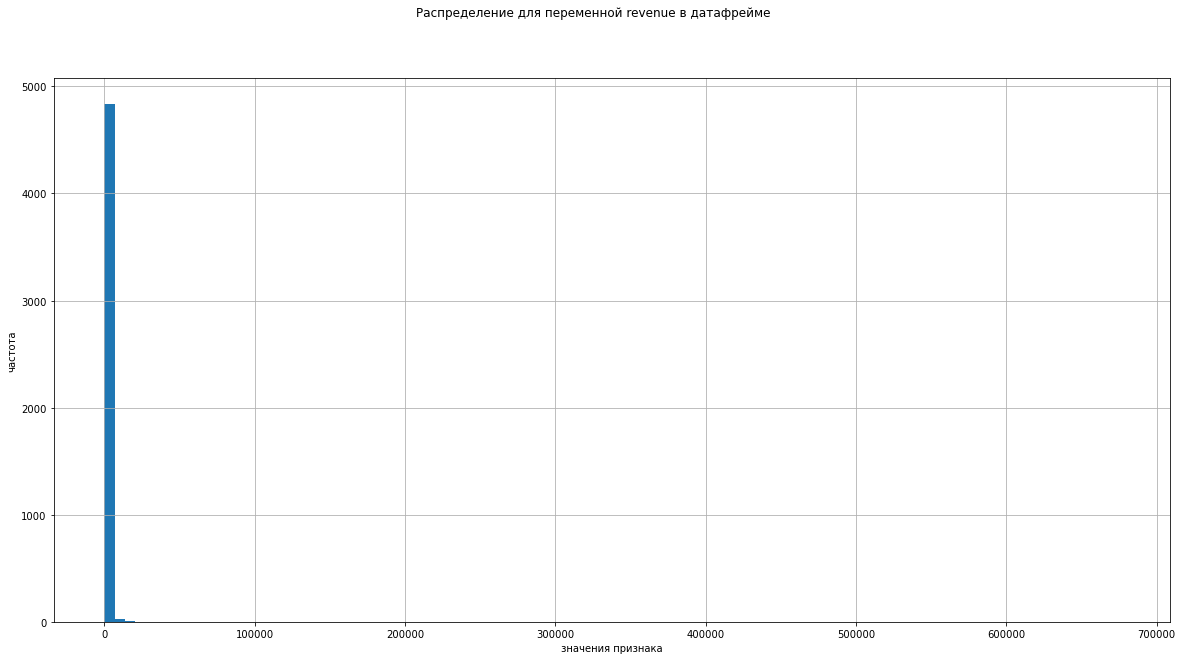

In [244]:
for col in df.drop(['customer_id', 'order_id', 'product'], axis = 1).columns:
    df[col].hist(bins = 100, figsize = (20, 10))
    plt.suptitle(f'Распределение для переменной {col} в датафрейме')
    plt.xlabel('значения признака')
    plt.ylabel('частота')
    plt.show()

- Гистограмма распределения переменной **`date`** имеет ярко выраженное пороговое строение - это говорит нам о том, что количество заказов днем и ночью различается. 

- Также мы видим тенденцию к сезонности. В частности, самое большое количество заказов наблюдается весной - в начале лета, также есть небольшой всплеск по заказам в июне. 

- Количество заказов достаточно высокое перед новогодними праздниками, но резко обрушается в январе (вероятно, покупатели приобретают товары в качестве подарков, а также украшения, искусственные елки. Естественно, в январе спрос на эти товары падает).

- Оживление наступает сразу после новогодних праздников, и с середины января появляется рост.

---
- Распределение переменной **`quantity`** подтверждает ту тенденцию, которая была обнаружена нами ранее: в подавляющем большинстве случаев покупатели приобретают товары поштучно. 

- При этом в данных присутствуют аномально большие значения. Мы полагаем, что все значения, которые больше 50, можно считать выбросами. 
 
---
- Гистограмма для переменной **`price`** дает нам возможность внимательнее рассмотреть диапазон цен. Как мы уже выяснили ранее, чаще всего цена товара укладывается в 500 р. Однако много и товаров с ценой до 1 500 р. 

- Есть и дорогие товары (максимальная цена товара равна 14 917 р.) - но мы уже доказали, что эти данные похожи на реальные, и у нас нет оснований считать их аномальными.

---
- Выручка (**`revenue`**) практически всегда укладывается в 10 000 р.

<a class='anchor' id='id-section11'/>

### [Удалим выбросы из данных](#id-section38)

Посмотрев на распределение переменной `quantity`, мы решили, что все значения, которые больше 50, можно считать выбросами. 

Но сначала узнаем, сколько данных мы потеряем, если избавимся от выбросов. Разделим количество "нормальных" строк (без выбросов) на общее количество строк в "грязном" датафрейме. 

In [245]:
display(df.query('quantity < 50').shape[0] / df.shape[0])

0.993638415760312

- Мы потеряем всего лишь 1% данных, если избавимся от выбросов, так что можно это сделать.
---

Переопределим датафрейм методом `loc` с условием, чтобы `quantity` было меньше 50.

In [246]:
df = df.loc[df.loc[:, 'quantity'] < 50]

<a class='anchor' id='id-section12'/>

### [Построим матрицу корреляций](#id-section39)

Для построения матрицы воспользуемся методом `corr()`, а для отображения сделаем тепловую карту методом `heatmap()`. Для корректного построения категориальные переменные и дату включать в расчеты не будем.  

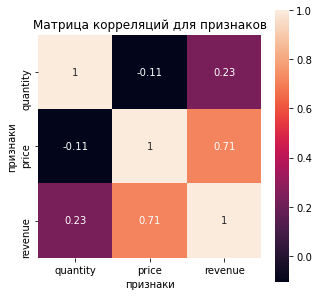

In [247]:
plt.figure(figsize = (5, 5))
ax = sns.heatmap(df.drop(['date', 'customer_id', 'order_id', 'product'], axis = 1).corr(), annot = True, \
                 square = True)
ax.set_xlabel('признаки')
ax.set_ylabel('признаки')
ax.set_title('Матрица корреляций для признаков')
plt.show()

- После удаления выбросов **наиболее сильная корреляция** (0.71) наблюдается между **выручкой** и **ценой** товара (связь прямая положительная - чем дороже стоит товар, тем больше выручка). 
- Получается, что **количество** (`quantity`) товаров после удаления выбросов практически **не оказывает влияния** на **выручку** (коэффициент = 0.23). 
- **Цена также не влияет на количество** покупаемого товара (коэффициент = -0.11). Видимо, из-за того, что в основном ассортименте магазина только недорогие товары. 

<a class='anchor' id='id-section13'/>

### [Вывод](#id-section40)

**Исследовательский анализ данных** позволил нам прийти к таким **выводам**:

- Мы располагаем данными **за год**: с 1 октября 2018 г. по 31 октября 2019 г.
- Распределение переменной `date` имеет ярко выраженное пороговое строение - это говорит нам о том, что количество заказов днем и ночью различается.
- Также мы видим тенденцию к **сезонности**. В частности, самое большое количество заказов наблюдается весной - в начале лета, также есть небольшой всплеск по заказам в июне.
- Количество заказов достаточно высокое **перед новогодними праздниками**, но резко падает в январе (вероятно, покупатели приобретают товары в качестве подарков, а также украшения, искусственные елки. Естественно, в январе спрос на эти товары падает).
- Оживление наступает сразу после новогодних праздников, и с середины января появляется **рост**.
---
- В подавляющем большинстве случаев покупатели приобретают товары **поштучно** (распределение переменной `quantity` подтверждает эту тенденцию).
- При этом в данных присутствовали аномально большие значения. Мы предположили, что все значения, которые больше 50, можно считать выбросами.
---
- О цене товаров (`price`) мы можем сказать, что в большинстве случаев цена товара укладывается в **500 р.** Однако много и товаров с ценой до 1 500 р.
- Есть и **дорогие товары** (максимальная цена товара "Сушилка уличная Leifheit 85210 LINOMATIC V 400" равна 14 917 р.) - но мы доказали, что эти данные похожи на реальные, и у нас нет оснований считать их аномальными.
---
- Покупатели в основном приносят нам до **734 р. выручки** (75-й перцентиль в переменной `revenue`).
- Распределение выручки практически всегда укладывается в 10 000 р.
- Максимальная прибыль была равна 675 000 р., что явно похоже на выброс. Его возникновение мы связали с выбросами в переменной `quantity` (так как `revenue` - это производная переменная от цены и количества товара).
---

Посмотрев на распределение переменной `quantity`, мы решили, что все значения, которые больше 50, можно считать **выбросами**.
- Удалив выбросы, мы потеряли 1% данных.
---

Построение **матрицы корреляций** показало следующий результат:

- После удаления выбросов **наиболее сильная корреляция** (0.71) наблюдается между **выручкой** и **ценой** товара (связь прямая положительная - чем дороже стоит товар, тем больше выручка). 
- Получается, что **количество** (`quantity`) товаров после удаления выбросов практически **не оказывает влияния** на **выручку** (коэффициент = 0.23). 
- **Цена также не влияет на количество** покупаемого товара (коэффициент = -0.11). Видимо, из-за того, что в основном ассортименте магазина только недорогие товары. 



<a class='anchor' id='id-section14'/>

## [Шаг 4. Проведем сегментацию покупателей](#id-section41)



<a class='anchor' id='id-section15'/>

### [Выделим категории товаров для сегментации покупателей](#id-section42)

В связи с тем, что у нас нет принятой категоризации товаров, мы решили опереться на опыт других интернет-магазинов и посмотреть, какие категории товаров есть у них.

Мы создали 2 функции для парсинга, которые скачивают каталог товаров для дома с сайта: https://igooods.ru/catalog и формируют датафрейм с каталогом товаров и их категориями. Мы опирались на эту статью: https://leftjoin.ru/all/parsim-dannye-kataloga-sayta-ispolzuya-beautiful-soup-chast-1/. 

Мы запустили эти функции 1 раз на PyCharm, а потом сохранили их результат в промежуточный файл в формате csv на гугл-диске, и уже для дальнейшего анализа использовали только его. 

Закомментированный код для парсинга и сохранения каталога идет ниже. 

In [248]:
# from bs4 import BeautifulSoup
# import requests
# import re

# import time
# from selenium import webdriver
# from bs4 import BeautifulSoup as bs

# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.wait import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC


In [249]:
# # в этом кусочке кода мы получаем все категории и подкатегории с сайта igooods.ru с ссылками.
# # для этого мы передадим в метод get() cookies, которые мы взяли из браузера (инстр. разработчика).
# # без cookies сайт не дает посмотреть категории 

# session = requests.Session()
# request = session.get('https://igooods.ru/catalog',
#                       cookies={ 
#                           }
#                       )
# soup = BeautifulSoup(request.text)
 


# # метод, который проверяет, есть ли в списке строк строка, удовл. регулярному выражению 
# def check(lst, reg):
#     for w in lst:
#         m = re.search(reg, w)
#         if (m != None):
#             return True
 
#     return False
 

# dict = {}

# # получаем все теги типа div и ищем там те, которые удовлетворяют найденному нами регуляр. выражению - 
# # они соответствуют категориям товаров. 
# # из них мы получим название категории и ссылку на нее, а внутри этого тега содержатся названия подкатегорий и 
# # ссылки на них - вытащим их тоже 

# cat = soup.find_all('div') 


# for c in cat:
#     lst = c.get('class')
#     if (lst != None and len(lst) > 0):
#         cr = check(lst, 'MenuItem__Container.*')
#         if cr:
#             link = c.find('a').get('href')
#             text = c.find('a').find_all('div')[1].get_text()
#             tmp = {}
#             tmp['name'] = text
#             tmp['link'] = link
#             subcats = {}
#             sbc = c.find_all('div')[3].find_all('a')
#             for subc in sbc:
#                 subcategoryLink = subc.get('href')
#                 subcategoryText = subc.find('div').get_text()
#                 subcats[subcategoryLink] = subcategoryText
#             tmp['subcats'] = subcats
#             dict[link] = tmp

# # так мы получили dict - словарь c категориями
# # ниже пример его структуры для одной категории 
# # из данного словаря мы руками удалили все категории, нерелевантные нашему исследованию (еду)
# dict = {
#     "/catalog/categories/16": {
#         "name": "Бытовая химия и уборка",
#         "link": "/catalog/categories/16",
#         "subcats": {
#             "/catalog/categories/16/145": "Аксессуары для уборки",
#             "/catalog/categories/16/142": "Для мытья посуды",
#             "/catalog/categories/16/141": "Для стирки",
#             "/catalog/categories/16/147": "Освежители воздуха",
#             "/catalog/categories/16/144": "Чистящие средства"
#         }
#     }
# }
 

In [250]:
# # в статье, которой мы пользовались, было рекомендовано исп. selenium - одного BeautifulSoup будет 
# # недостаточно, так как сайт использует динамическую подгрузку при скроллинге
# # тут мы также будем исп. cookies, которые мы взяли из браузера (инстр. разработчика).
 
# browser = webdriver.Chrome("/paths/to/chromedriver")


# cookies_1 = [
#     {

#     }
# ]
# browser.get("https://igooods.ru/catalog/categories/222/224")
# for cookie in cookies_1:
#     browser.add_cookie(cookie)


# # метод для получения всех товаров по ссылке на подкатегорию. 
# # открываем с помощью selenium страницу по ссылке, ждем ее загрузки, затем 100 раз имитируем нажатие кнопки
# # PAGE_DOWN, чтобы страница проскроллилась до самого низа, и все товары подгрузились. 
# # далее, используя BeautifulSoup, достаем названия всех товаров, возвращаем их как массив
# def parse(link):
#     try:
#         browser.get(link)
#         time.sleep(1)
#         WebDriverWait(browser, 10000).until(EC.visibility_of_element_located((By.TAG_NAME, 'body')))
#         input = browser.find_element_by_tag_name('input')
#         if (input != None):
#             for i in range(0, 100):
#                 input.send_keys(Keys.PAGE_DOWN)
#                 time.sleep(0.02)
#         source_data = browser.page_source
#         soup = bs(source_data)
#         goods = soup.find_all('div', {'data-testid': 'PRODUCT_NAME_TEST_ID'})
#         arr = []
#         for x in goods:
#             arr.append(x.get('title'))
#         return arr
#     except:
#         print("An exception occurred for" + link )
#         return []

 

# lst = []
 
# # обходим все категории в полученном ранее словаре.
# # для каждой категории перебираем все подкатегории и для каждой из них загружаем товары
# for element in dict:
#     category = dict[element]
#     catName = category['name']
#     for subCategory in category['subcats']:
#         subCatName = category['subcats'][subCategory]
#         link = str("https://igooods.ru") + subCategory
#         arr = parse(link)
#         for item in arr:
#             lst.append([item, catName, subCatName])
            
# # создаем DataFrame из полученного результата и сохраняем его в файл-каталог, который загрузим на гугл-диск 
# # и будем исп. в дальнейшей работе

# df = pd.DataFrame(lst, columns=['name', 'category', 'subcategory'])
 
# df.to_csv('./result.csv')

Прочитаем готовый файл с каталогом и посмотрим на него.

Также посмотрим, сколько товаров содержится в каждой категории.

In [251]:
result1 = pd.read_csv('https://docs.google.com/uc?export=download&id=1aYf99gncAuM60q5Gz089vWF53gayBnUz')

display(result1.head())

display(result1.groupby('category').count())

,Unnamed: 0,name,category,subcategory
0,0,"Мешки для мусора ТМ Aro (Аро) 48*58см, 30*30л",Бытовая химия и уборка,Аксессуары для уборки
1,1,"Тряпки в рулонах многоразового использования, ...",Бытовая химия и уборка,Аксессуары для уборки
2,2,"Мешки для мусора ТМ Aro (Аро) 58*68см, 20*60л",Бытовая химия и уборка,Аксессуары для уборки
3,3,Салфетки губчатые 15*18см Fine Life (Файн Лайф...,Бытовая химия и уборка,Аксессуары для уборки
4,4,Мешки для мусора ТМ Paclan multitop (Паклан му...,Бытовая химия и уборка,Аксессуары для уборки


,Unnamed: 0,name,subcategory
category,,,
Бытовая химия и уборка,1256,1256,1256
Все для кухни,814,814,814
Для дома и сада,592,592,592
Косметика и гигиена,2379,2379,2379
"Спорт, хобби и отдых",559,559,559
Текстиль и гардероб,646,646,646
Техника и электроника,145,145,145


Методом `loc` мы решили избавиться от категорий: "Косметика и гигиена", "Бытовая химия и уборка" (товаров в этих категориях слишком много, что приводит к несбалансированности классов), "Спорт, хобби и отдых" (для нашего магазина такие товары не  подходят). 

In [252]:
result1 = result1.loc[result1.loc[:, 'category'] != 'Косметика и гигиена']
result1 = result1.loc[result1.loc[:, 'category'] != 'Бытовая химия и уборка']
result1 = result1.loc[result1.loc[:, 'category'] != 'Спорт, хобби и отдых']

---
***Мы собрали этот каталог для того, чтобы создать модель машинного обучения, обучить ее на данных из каталога (по наименованию товара предсказывать его категорию), а потом применить обученную модель к нашему основному датафрейму.***

---
Однако в каталоге названия содержат много символов и сокращений, нужно убрать оттуда весь мусор и пролемматизировать товары, чтобы привести все слова к грамматическим основам - так модели будет легче обучаться.

Из за особенностей наименований товаров в каталоге нам необходимо расширить список русских стоп-слов из модуля `stopwords.words("russian")` `методом extend()`. Например, включить туда такие сокращения, как: "см", "л", "тм", "ассортименте".


In [253]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['см', 'л', 'тм', 'ассортименте'])

Создадим функцию для лемматизации товаров. Она приведет слова к грамматической основе, уберет знаки пунктуации, цифры и стоп-слова. Образец кода был найден в статье: https://leftjoin.ru/all/stroim-model-predskazaniya-kategorii-produktov/. 

In [254]:
m = Mystem()

def lemmatize_text(text):
    text = str(text)
    tokens = m.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and len(token) >= 3 \
              and token.strip() not in punctuation \
              and token.isdigit() == False]
    text = " ".join(tokens)
    return text

Применим функцию ко столбцу с товарами из нашего каталога. Создадим в каталоге новый столбец с леммами.

In [255]:
result1['lemmas'] = result1['name'].apply(lemmatize_text)

display(result1.head())

,Unnamed: 0,name,category,subcategory,lemmas
3635,3635,Набор кухонных полотенец ТМ Tarington House (Т...,Все для кухни,Кухонный текстиль,набор кухонный полотенце tarington house тарин...
3636,3636,Рукавица-прихватка ТМ Портал,Все для кухни,Кухонный текстиль,рукавица прихватка портал
3637,3637,Набор полотенец кухонных в ассортименте ТМ Tar...,Все для кухни,Кухонный текстиль,набор полотенце кухонный ассортимент tarington...
3638,3638,Салфетка индивидуальная ТМ Household (Хаусхолд),Все для кухни,Кухонный текстиль,салфетка индивидуальный household хаусхолд
3639,3639,Набор полотенец ТМ Солнечный дом,Все для кухни,Кухонный текстиль,набор полотенце солнечный дом


Разделим данные из каталога на признаки (матрица X - пролемматизированные наименования товаров) и целевую переменную (y - категории товаров). 

Разделим выборку на обучающую и валидационную в отношении 80% к 20% функцией `train_test_split()`, так как мы доверяем именно этой общепринятой пропорции для деления.

In [256]:
X = result1['lemmas']
y = result1['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Построим модель предсказания категории с помощью `CountVectorizer` (разобьет текст на токены и посчитает их количество), `TfidfTransformer` (для подсчета весов вхождения каждого токена) и `MultinomialNB` (позволит обучить модель предсказывать категорию товара).

С помощью библиотеки `Pipeline` запустим по очереди все команды. 

In [257]:
# Пройдем пайплайном команды:
# CountVectorizer() — вернет матрицу с количеством вхождений каждого токена
# TfidfTransformer() — преобразует эту матрицу в нормализованное представление tf-idf
# MultinomialNB() — наивный байесовский классификатор для предсказания категории товара

text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1,2))),
                     ('tfidf', TfidfTransformer()), 
                    ('clf', MultinomialNB())])

Обучим модель `text_clf` на обучающей выборке (`X_train`, `y_train`) и посчитаем предсказания по валидационной выборке (`X_test`).


In [258]:
text_clf = text_clf.fit(X_train, y_train)

y_pred = text_clf.predict(X_test)

Оценим качество работы модели методом `score()`.

In [259]:
print('Score:', text_clf.score(X_test, y_test))

Score: 0.9136363636363637


- Модель прогнозирует категории для товаров в каталоге достаточно точно.
---

Перед тем, как запустить модель для предсказания категорий товаров на наших реальных данных, пролемматизируем столбец с наименованием товаров при помощи написанной ранее функции `lemmatize_text`.

In [260]:
df['lemmas'] = df['product'].apply(lemmatize_text)

display(df.head())

,date,customer_id,order_id,product,quantity,price,revenue,lemmas
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,комнатный растение горшок алый вера d12 h30
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,комнатный растение горшок кофе арабика d12 h25
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,радермахер
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,хризолидокарпус лутесценс
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,циперус зумул


Передадим модели `text_clf` для предсказания категорий столбец с леммами, предсказания будут сохранены в переменной `prediction`. 

Создадим в датафрейме новый столбец `category` с категориями-предсказаниями. 

Посчитаем, сколько товаров по каждой категории получилось выявить.

In [261]:
prediction = text_clf.predict(df['lemmas'])

df['category'] = prediction

display(df.groupby('category')['product'].count())

category
Все для кухни          1981
Для дома и сада        1310
Текстиль и гардероб    1551
Name: product, dtype: int64

Посмотрим, какие товары вошли в категорию "Для дома и сада", так как нам для проверки гипотезы в дальнейшем интересна именно эта категория.

In [262]:
display(df.query('category == "Для дома и сада"').sample(10, random_state = 0))

,date,customer_id,order_id,product,quantity,price,revenue,lemmas,category
5745,2019-07-09 17:00:00,42d3cb27-6519-4627-9b4a-5aa8ee600203,14897,Рассада Огурец Нежинский ячейки по 6 шт Е6,1,120.0,120.0,рассада огурец нежинский ячейка,Для дома и сада
2937,2019-04-17 20:00:00,f83eedd3-aaad-48ed-9977-55f6046477a3,14655,Подвесное кашпо Бакопа ампельная мега-крупная ...,1,488.0,488.0,подвесной кашпо бакоп ампельный мега крупный с...,Для дома и сада
2713,2019-04-07 14:00:00,9c59ebc7-39e2-49f8-b817-4113824522f8,14621,Рассада зелени для кухни Мелисса лимонная зеле...,1,89.0,89.0,рассада зелень кухня мелисса лимонный зеленый ...,Для дома и сада
5817,2019-07-10 21:00:00,6caea624-7a90-4a0f-8704-2612e344a4b3,71937,Ящик почтовый металлический с врезным замком П...,1,277.0,277.0,ящик почтовый металлический врезной замок почта,Для дома и сада
2407,2019-03-20 08:00:00,9990ce3c-995c-4990-8dc5-75583a0c11d2,70803,Щетка для труднодоступных мест со скребком ROZ...,3,75.0,225.0,щетка труднодоступный место скребок rozenbal r...,Для дома и сада
6028,2019-08-02 19:00:00,030c91b7-311d-407e-a3ac-e64c03537569,72189,Тележка хозяйственная багажная D-T101 грузопод...,1,150.0,150.0,тележка хозяйственный багажный t101 грузоподъе...,Для дома и сада
23,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,"Рассада зелени для кухни Базилик Тонус, кассет...",1,169.0,169.0,рассада зелень кухня базилик тонус кассета 6шт,Для дома и сада
1437,2019-01-05 04:00:00,6ab10937-fd06-4010-9178-6b5bcc7cdc1d,69706,Вешалка гардеробная Радуга 1 ЗМИ белое серебро...,1,824.0,824.0,вешалка гардеробная радуга зми белый серебро внп,Для дома и сада
2062,2019-02-28 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70502,Цветок искусственный Ландыш 20 см пластик,10,35.0,350.0,цветок искусственный ландыш пластик,Для дома и сада
3879,2019-05-17 10:00:00,1420716a-02ef-426f-828d-fddcb0e1f532,14786,Петуния изи вейв рассада однолетних цветов в г...,1,142.0,142.0,петуния изя вейв рассада однолетний цветок гор...,Для дома и сада


- Модель, конечно же, работает с ошибками, но в целом категория определена корректно.
---

Посмотрим, насколько ярко проявляют себя категории в данных. Для этого посчитаем количество заказов и выручку от покупок для каждой категории. Результат выведем на графики (их построение оформлено в функцию). 

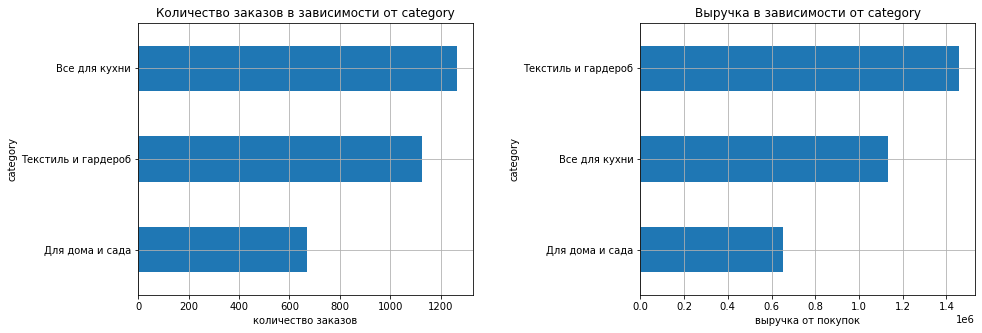

In [263]:
def plot(df, column):
    fig, (a, b) = plt.subplots(1, 2, figsize = (15, 5))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    df.groupby(column)['order_id'].nunique().sort_values().plot\
    (title = f'Количество заказов в зависимости от {column}', kind = 'barh', grid = True, ax = a)
    a.set_xlabel('количество заказов')
    a.set_ylabel(f'{column}')
    
    df.groupby(column)['revenue'].sum().sort_values().plot\
    (title = f'Выручка в зависимости от {column}', kind = 'barh', grid = True, ax = b)
    b.set_xlabel('выручка от покупок')
    b.set_ylabel(f'{column}')
    plt.show()
    
plot(df, 'category')

- После предсказания категорий с помощью модели мы видим, что **больше всего заказов** было сделано в категории "Все для кухни", меньше всего - в категории "Для дома и сада".

- Заказы в категории "Текстиль и гардероб" принесли **больше всего выручки**, меньше всего - снова в категории "Для дома и сада".

<a class='anchor' id='id-section16'/>

### [Выделим сегменты покупателей по дням недели совершения покупок](#id-section43)

Для сегментирования покупателей создадим дополнительный столбец с днем недели методом `dt.weekday`.

В результате понедельник будет классифицирован как день 0, а воскресенье — как день 6.

In [264]:
df['weekday'] = df['date'].dt.weekday

display(df.head(2))

,date,customer_id,order_id,product,quantity,price,revenue,lemmas,category,weekday
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,комнатный растение горшок алый вера d12 h30,Для дома и сада,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,комнатный растение горшок кофе арабика d12 h25,Для дома и сада,0


Вызовем написанную функцию `plot()` для построения двух графиков - с расчетом количества заказов и выручки от покупок для каждого дня недели. 

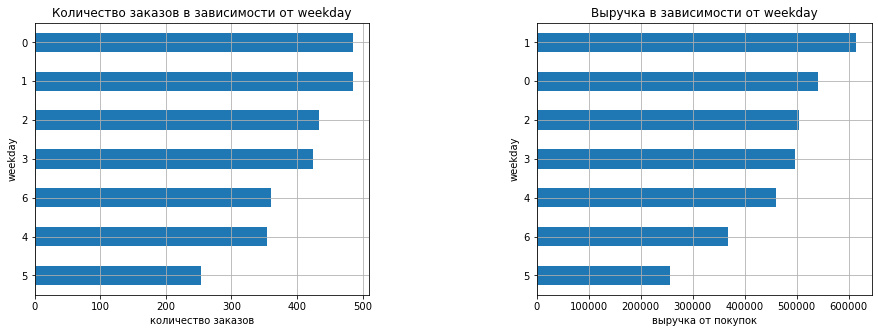

In [265]:
plot(df, 'weekday')

- **Больше всего заказов** было сделано в понедельник и вторник, меньше всего - в субботу, пятницу и воскресенье (вероятно, выходные дни и вечер пятницы покупатели проводят в офлайн-магазинах)

- Логично, что в плане выручки данные показали тот же результат: **больше всего выручки** с заказов было получено в понедельник и вторник, а **меньше всего** - в выходные дни и пятницу.

<a class='anchor' id='id-section101'/>

### [Выделим сегменты покупателей с помощью машинного обучения (алгоритм кластеризации)](#id-section102)

Мы решили, что оперировать месяцами модели машинного обучения будет неудобно (слишком вариативный и масштабный признак), поэтому лучше разделить все месяцы на кварталы.  

In [266]:
# выделим месяц
df['month'] = df['date'].dt.month

# функция для разделения месяцев на годовые кварталы
def extract_quarter(element):
    if element in (1,2,3):
        return 1
    if element in (4,5,6):
        return 2
    if element in (7,8,9):
        return 3
    if element in (10,11,12):
        return 4

# создадим новый столбец с годовыми кварталами
df['quarter'] = df['month'].apply(extract_quarter)    

Также мы решили, что нельзя давать модели для кластеризации дни недели (их тоже слишком много), поэтому укрупним этот признак и выделим будние и выходные дни отдельно. 

In [267]:
# функция для отнесения дня недели к буднему или выходному дню
def extract_week_days_ends(element):
    if element not in (5,6):
        return 'weekday'
    if element in (5,6):
        return 'weekend'

# создание нового столбца с буднями и выходными днями
df['week_days_ends'] = df['weekday'].apply(extract_week_days_ends)

Так как мы будем группировать данные по заказам, может оказаться, что в один заказ попадут товары из нескольких категорий. Поэтому надо определить, какая товарная категория (из 3-х возможных) будет превалирующей. Каждому заказу будет присвоена та категория, товаров которой больше всего попало в заказ. 

In [268]:
# фукнция для подсчета товарных категорий, входящих в каждый заказ 
#  в результате каждому заказу присвоится та категория, товаров из которой больше всего попало в заказ
def selectCategory(cats):
    c1 = 0
    c2 = 0
    c3 = 0
    for x in cats:
        if x == 'Все для кухни':
            c1 += 1
        if x == 'Для дома и сада':
            c2 += 1
        else:
            c3 += 1
    if c1 >= c2 and c1 >= c3:
        return 'Все для кухни'
    if c2 >= c1 and c2 >= c3:
        return 'Для дома и сада'
    return 'Текстиль и гардероб'


Сформируем таблицу по заказам, где для каждого заказа будет указан годовой квартал покупки, будний или выходной это был день, сумма заказа, победившая товарная категория (с применением функции выше). Эту таблицу мы передадим модели машинного обучения для кластеризации.

In [269]:
ml_orders = df.groupby('order_id').agg({'quarter': 'min', 'week_days_ends': 'min', \
                                        'revenue': 'sum', 'category': selectCategory})

display(ml_orders.head())

,quarter,week_days_ends,revenue,category
order_id,,,,
12624,2,weekend,375.0,Все для кухни
13547,4,weekday,684.0,Для дома и сада
14480,4,weekday,359.0,Для дома и сада
14481,4,weekday,600.0,Текстиль и гардероб
14482,4,weekend,376.0,Текстиль и гардероб


Для дальнейшей работы надо оцифровать все категориальные переменные. Используем для этого метод `pd.get_dummies()`. Так как мы максимально укрупнили временные переменные (кварталов всего 4, будней и выходных - 2 варианта), товарных категорий всего 3 - в результате таблица не разрастется слишком сильно. 

In [270]:
ml_orders = pd.get_dummies(data = ml_orders, columns = ['quarter', 'week_days_ends', 'category'])
display(ml_orders.head())

,revenue,quarter_1,quarter_2,quarter_3,quarter_4,week_days_ends_weekday,week_days_ends_weekend,category_Все для кухни,category_Для дома и сада,category_Текстиль и гардероб
order_id,,,,,,,,,,
12624,375.0,0,1,0,0,0,1,1,0,0
13547,684.0,0,0,0,1,1,0,0,1,0
14480,359.0,0,0,0,1,1,0,0,1,0
14481,600.0,0,0,0,1,1,0,0,0,1
14482,376.0,0,0,0,1,0,1,0,0,1


**Построим матрицу расстояний и нарисуем дендрограмму, чтобы спрогнозировать оптимальное число кластеров.**

Но перед работой с алгоритмом кластеризации `linkage()` выполним стандартизацию признаков и передадим получившуюся стандартизированную таблицу в качестве параметра функции `linkage()` с параметром `method = 'ward'`.

Таким образом, в переменной `linked` будет сохранена таблица связок между объектами (матрица расстояний), которую мы визуализируем как дендрограмму методом `dendrogram()`.

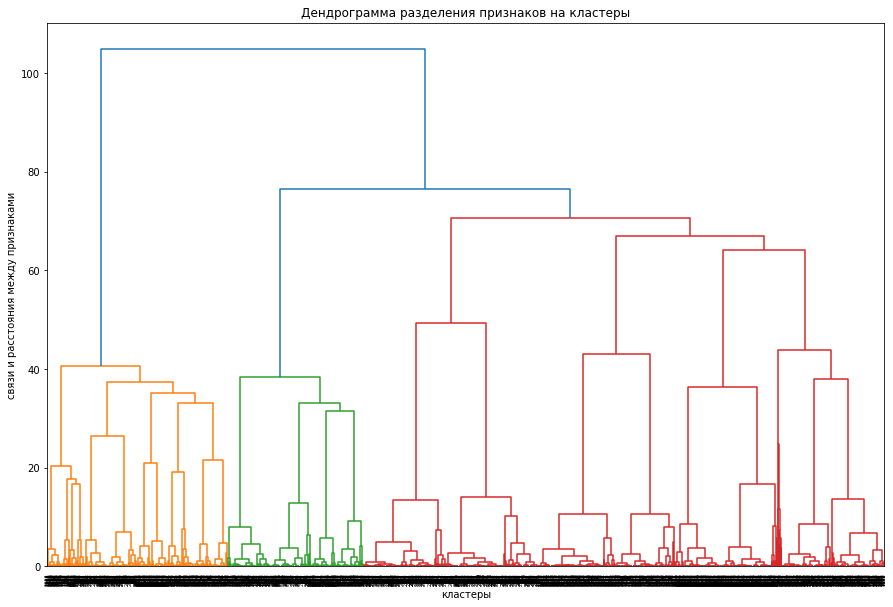

In [271]:
# стандартируем данные перед работой с алгоритмом
sc = StandardScaler()
X_sc = sc.fit_transform(ml_orders)

linked = linkage(X_sc, method = 'ward')

# рисуем дендрограмму
plt.figure(figsize = (15, 10))  
dendrogram(linked, orientation = 'top')
plt.title('Дендрограмма разделения признаков на кластеры') 
plt.xlabel('кластеры')
plt.ylabel('связи и расстояния между признаками')
plt.show() 

- На основании дендрограммы мы можем считать, что **оптимальным числом кластеров является 3.**
---

**Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры покупателей.**

Алгоритм `K-Means` чувствителен к заданному числу кластеров, мы передадим ему значение, прогнозированное выше, - то есть 3. 

В переменной `labels` сохраним индексы предложенных алгоритмом групп (объекты, которым модель присвоила один и тот же индекс, относятся к одному кластеру).

In [272]:
# задаем модель K-Means с числом кластеров 3
km = KMeans(n_clusters = 3, random_state = 0) 

# прогнозируем кластеры для наблюдений (применяем алгоритм к данным и формируем вектор кластеров)
labels = km.fit_predict(X_sc) 

Проверим, **насколько качественно прошла кластеризация**. Для этого посчитаем значение метрики `silhouette_score` (показывает, насколько объект своего кластера похож на свой кластер больше, чем на чужой, то есть характеризует компактность (кучность) кластера и отделимость кластера от других).

На вход передадим стандартизованную матрицу признаков и метки, которые спрогнозировал алгоритм кластеризации, в виде списка.

In [273]:
display('Silhouette score для 3 кластеров: {:.2f}'.format(silhouette_score(X_sc, labels)))

'Silhouette score для 3 кластеров: 0.28'

Значение метрики силуэта оказалось **не очень высоким.** 

- При этом надо отметить, что алгоритм K-Means основан на предположении, что число кластеров (групп) заранее точно известно. Это довольно сильное допущение, и часто выбор оптимального количества кластеров заслуживает решения отдельных задач.

- Плюс, согласно теореме невозможности Клейнберга, оптимального алгоритма кластеризации не существует. Это значит, что в силу отсутствия разметки, нет единственно верного способа оценить результат работы алгоритма (все подходы к определению того, насколько хорошо разделили объекты, основаны на привлечении экспертов или эвристических оценках). 
---

В датасете `ml_orders` создадим новый столбец `claster`, куда сохраним метки кластеризации `labels` и посмотрим на результат.

In [274]:
ml_orders['claster'] = labels

display(ml_orders.head())

,revenue,quarter_1,quarter_2,quarter_3,quarter_4,week_days_ends_weekday,week_days_ends_weekend,category_Все для кухни,category_Для дома и сада,category_Текстиль и гардероб,claster
order_id,,,,,,,,,,,
12624,375.0,0,1,0,0,0,1,1,0,0,0
13547,684.0,0,0,0,1,1,0,0,1,0,2
14480,359.0,0,0,0,1,1,0,0,1,0,2
14481,600.0,0,0,0,1,1,0,0,0,1,1
14482,376.0,0,0,0,1,0,1,0,0,1,1


<a class='anchor' id='id-section17'/>

### [Посмотрим на средние значения признаков для сегментов](#id-section44)

1. Построим таблицу со средними значениями количественных переменных **по категориям товаров** методами `groupby()` и `mean()`.

In [275]:
display(df.drop(['order_id', 'weekday'], axis = 1).groupby('category').mean())

,quantity,price,revenue,month,quarter
category,,,,,
Все для кухни,2.527511,380.968703,571.493690,6.601212,2.567390
Для дома и сада,1.934351,382.609924,496.493130,5.971756,2.385496
Текстиль и гардероб,1.429400,805.484848,940.335912,6.837524,2.647969


- **Больше всего товаров** приобретается в категории "Все для кухни" (в среднем примерно по 3).
- Категория "Текстиль и гардероб" **самая дорогая** по средним ценам на товары (805 р.) и по выручке (940 р.), что логично, так как мы уже видели на матрице корреляций, что эти две характеристики сильно зависят друг от друга.
- Категория "Для дома и сада" занимает **средние позиции** по всем характеристикам.
---

2. Аналогичным образом построим таблицу со средними значениями количественных переменных **по дням недели.**

In [276]:
display(df.drop(['order_id'], axis = 1).groupby('weekday').mean())

,quantity,price,revenue,month,quarter
weekday,,,,,
0,2.105568,488.407193,628.270302,6.277262,2.450116
1,2.229036,507.715895,767.449312,6.554443,2.569462
2,1.872370,569.075736,707.447405,6.316971,2.510519
3,2.185897,485.602564,636.976923,6.444872,2.520513
4,1.926752,565.536624,733.941083,6.773885,2.643312
5,1.565678,478.991525,543.476695,6.758475,2.635593
6,1.994898,531.957483,625.079932,6.602041,2.539116


- **Больше всего товаров** заказывают в понедельник, вторник и четверг (в среднем примерно 2). **Меньше всего товаров** покупают по субботам.
- Товары с **самой большой средней ценой** заказывают во вторник (507 р.), среду (569 р.), пятницу (565 р.) и воскресенье (531 р.).
- **Самую большую выручку** в среднем интернет-магазин получает по вторникам, средам и пятницам (так как `revenue` связан с `price`). 
---

3. Посмотрим на средние значения признаков **для кластеров, которые были выделены алгоритмом.**

In [277]:
ml_orders.groupby('claster').mean().transpose()

claster,0,1,2
revenue,957.913523,1418.438069,1124.866900
quarter_1,0.278749,0.234973,0.234676
quarter_2,0.189512,0.204918,0.301226
quarter_3,0.211592,0.192168,0.190893
quarter_4,0.320147,0.367942,0.273205
week_days_ends_weekday,0.792088,0.775956,0.781086
week_days_ends_weekend,0.207912,0.224044,0.218914
category_Все для кухни,1.000000,0.000000,0.000000
category_Для дома и сада,0.000000,0.000000,1.000000
category_Текстиль и гардероб,0.000000,1.000000,0.000000


**Кластер 0 отличается следующими признаками:**
- покупатели приносят меньше всего выручки (в среднем 957 р. с заказа),
- четкого разделения покупателей на годовые кварталы не наблюдается, но с большей вероятностью они скорее делают покупки в 4 квартале,
- покупатели делают покупки по будням,
- покупают товары категории "Все для кухни".

**Отличительные черты кластера 1:**
- покупатели приносят максимальное количество всего выручки (в среднем 1418 р. с заказа, что больше, чем в остальных кластерах),
- снова не наблюдается четкого разделения покупателей на годовые кварталы, но с большей вероятностью они делают покупки в 4 квартале (как в кластере 0),
- покупатели делают заказы по будням,
- покупают товары категории "Текстиль и гардероб".

**Отличительные черты кластера 2:**
- покупатели приносят среднее количество выручки по сравнению с двумя другими кластерами (1124 р.),
- с большей вероятностью покупатели делают заказы во 2 квартале,
- покупатели делают покупки по будням,
- покупатели заказывают товары категории "Для дома и сада".
---

Мы также можем сделать вывод, что алгоритм выделил кластеры покупателей главным образом на основе того, товаров из какой категории содержится больше всего в их заказах. Это значит, что ранее мы совершенно верно самостоятельно выделили сегменты покупателей на основании товарных категорий. 

<a class='anchor' id='id-section18'/>

### [Построим распределения признаков для сегментов](#id-section45)



Посмотрим, как распределена каждая переменная в разных товарных категориях. Графики расположим рядом друг с другом. Для такого оформления напишем две функции:
- первая функция будет строить гистограмму с соответствующими подписями в зависимости от переменной и сегмента,
- вторая функция методом `subplots()` располагает гистограммы по каждой переменной рядом.

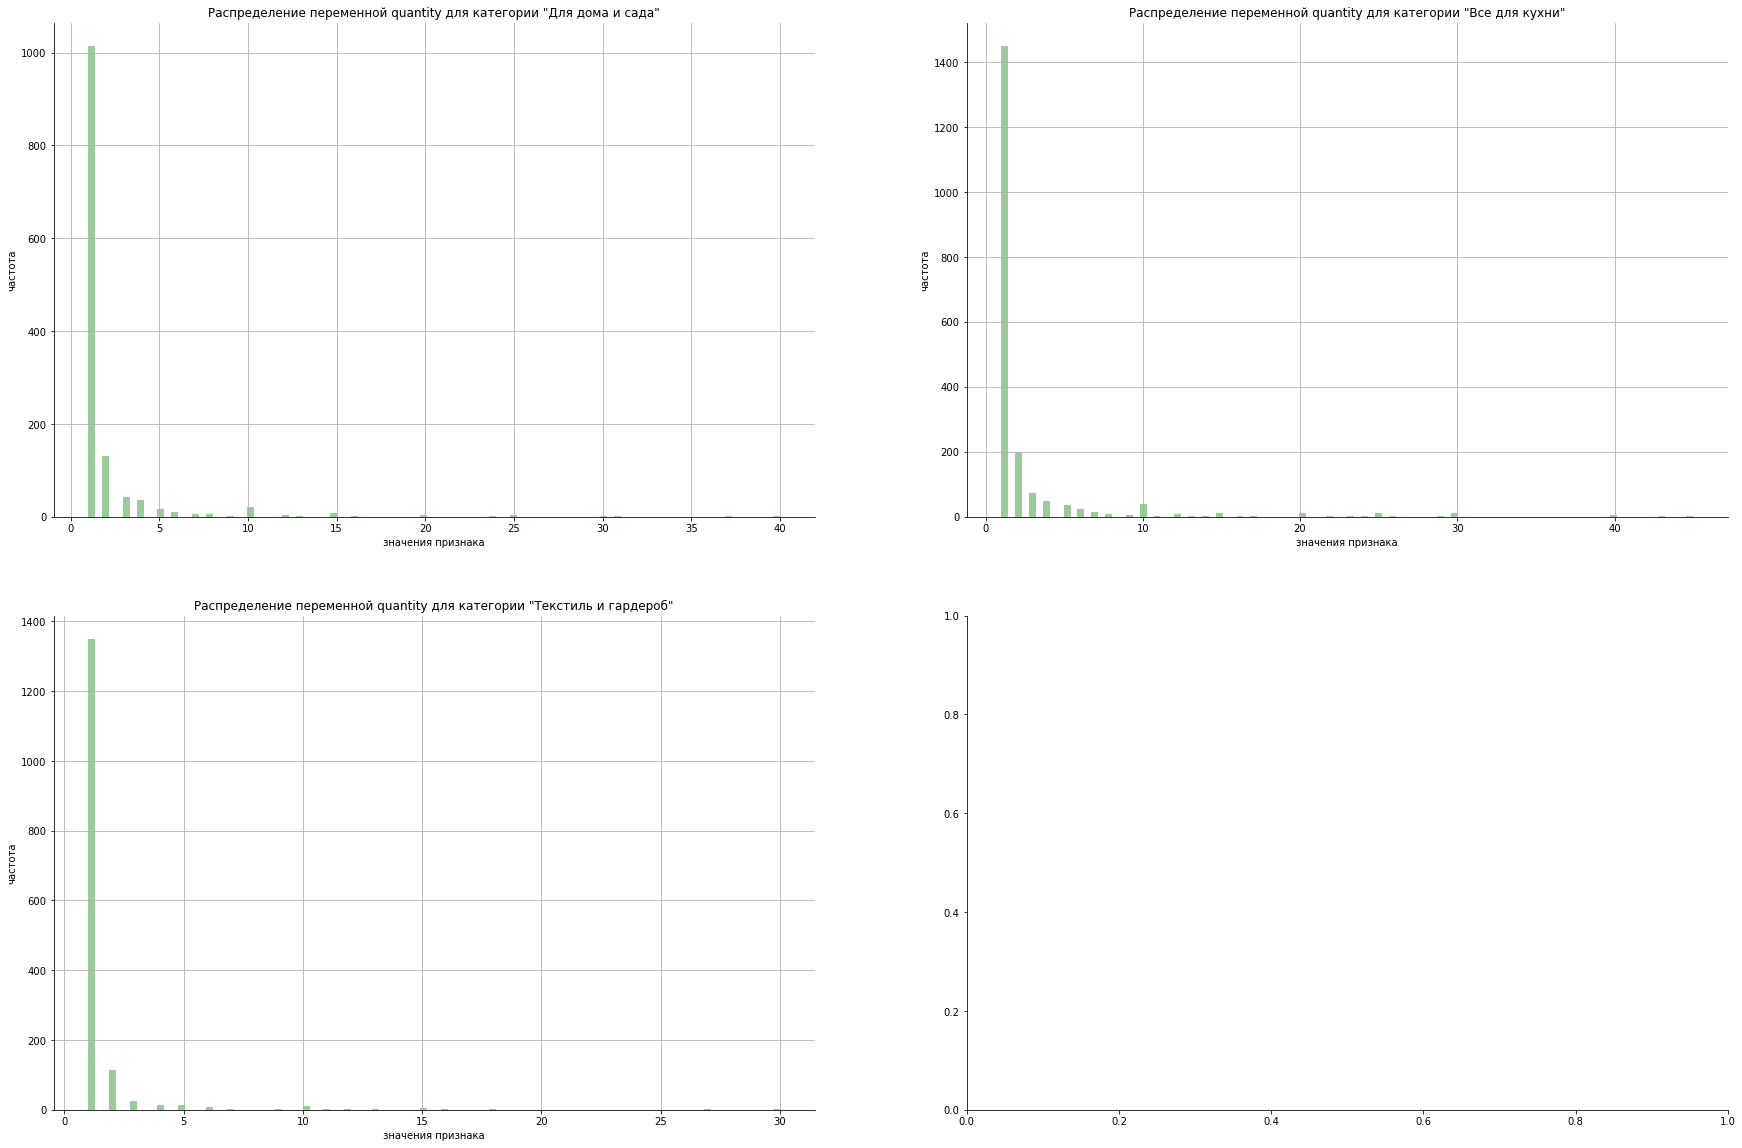

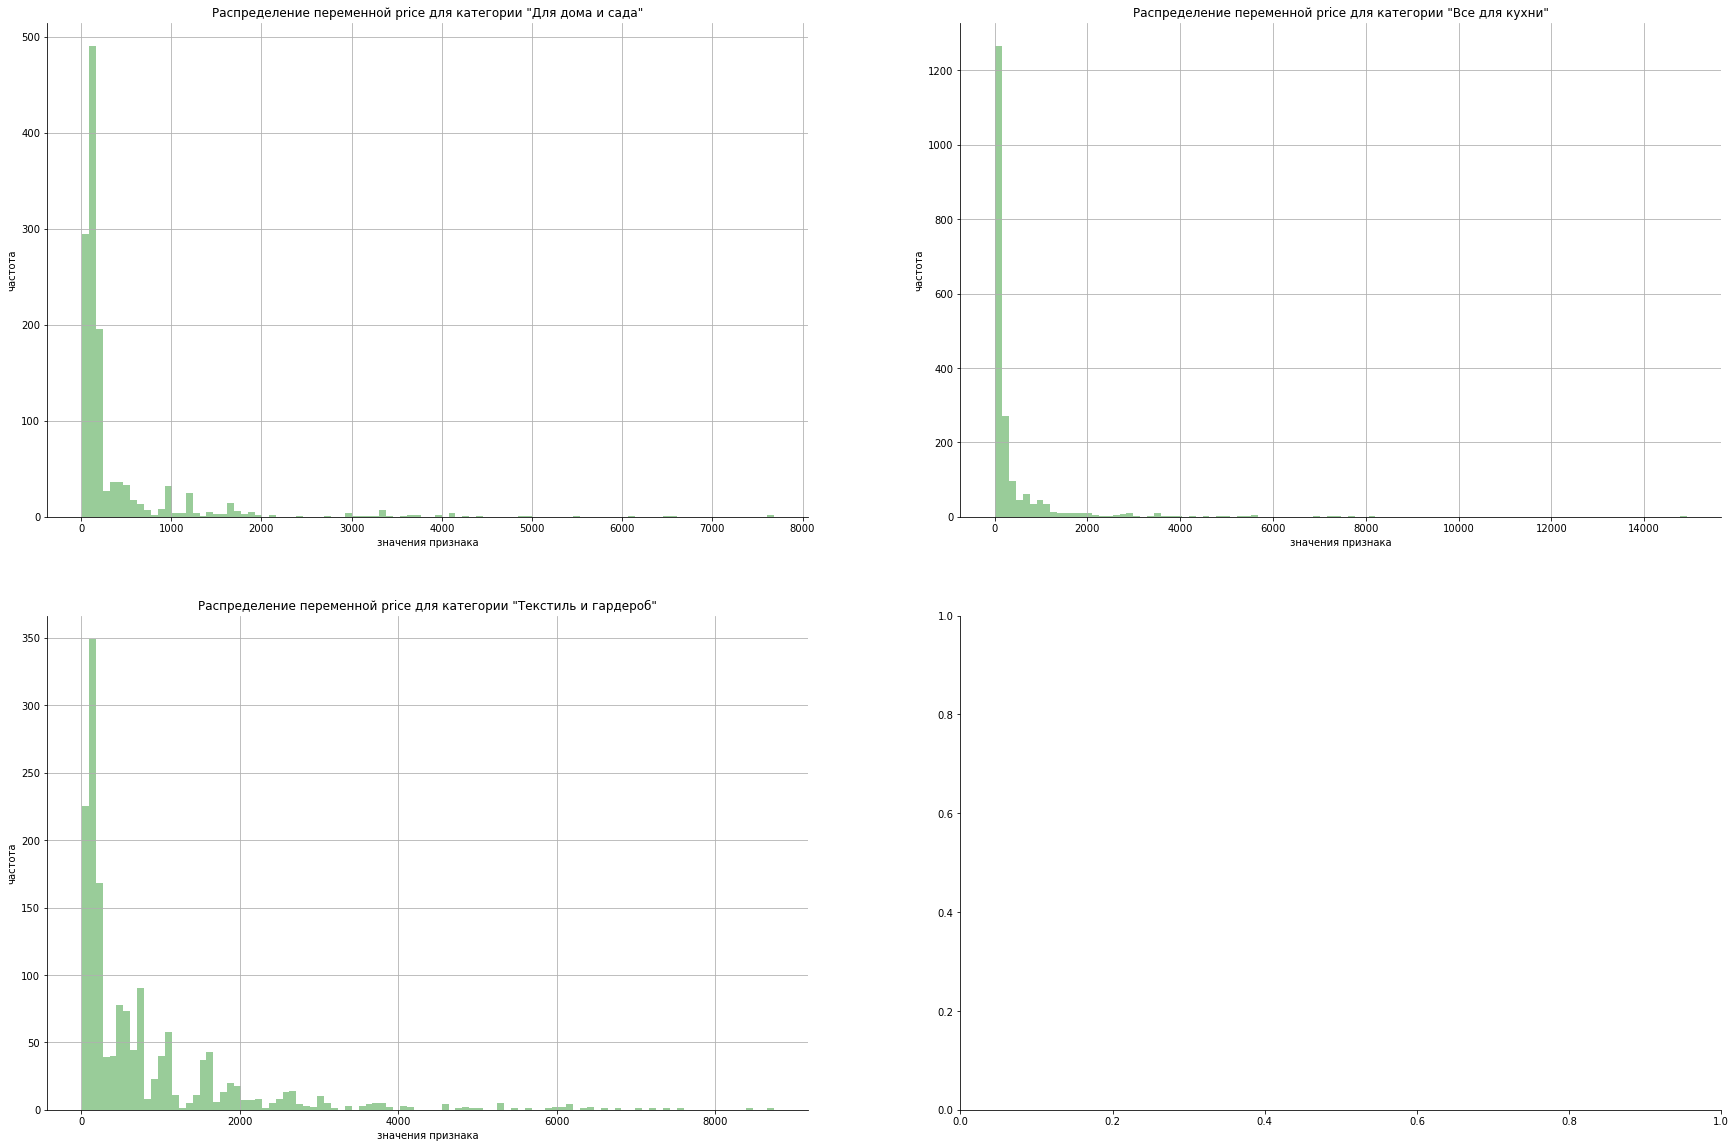

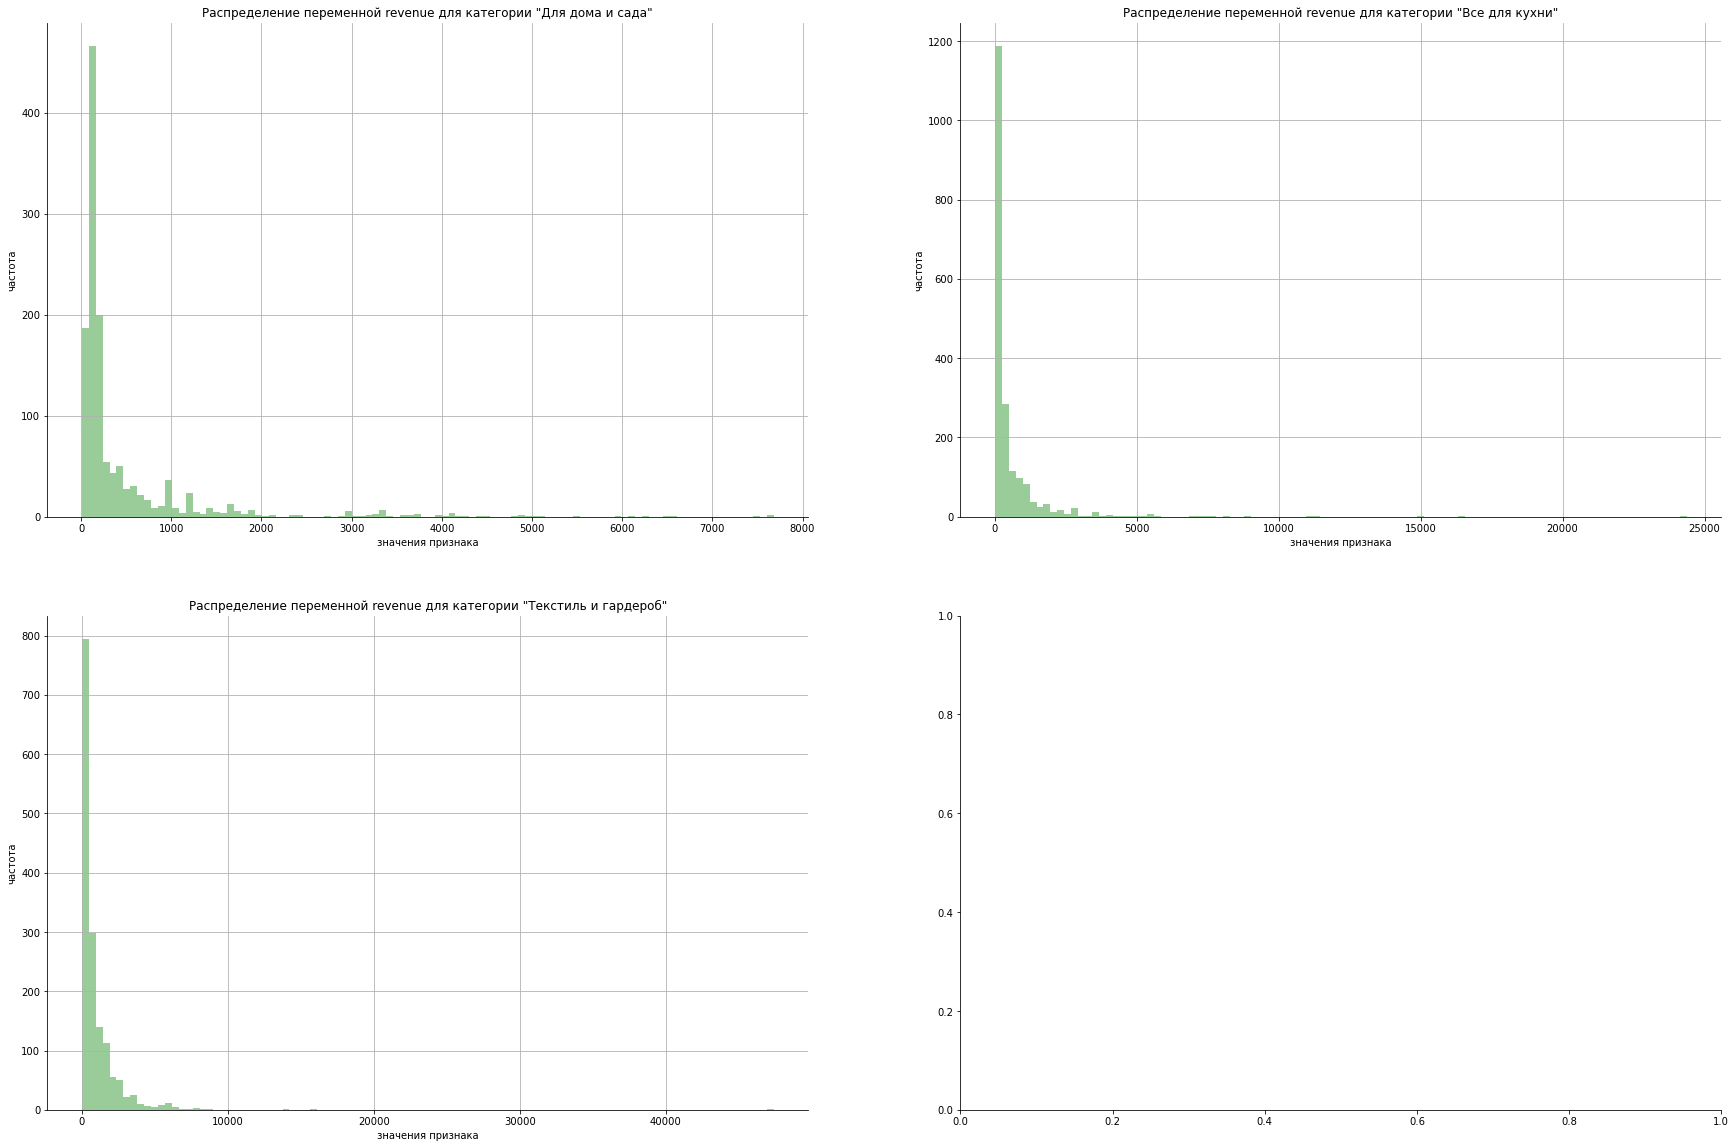

In [278]:
# функция для построения гистограммы 
def plotOne(df, col, cat, axI): 
    sns.distplot(df[col], bins = 100, color = 'green', kde = False, kde_kws = {'bw':0.1}, ax = axI)
    axI.set_xlabel('значения признака')
    axI.set_ylabel('частота')
    axI.set_title(f'Распределение переменной {col} для категории "{cat}"')
    axI.grid()
    sns.despine()

    
# функция с вызовом subplots() располагает гистограммы по каждой переменной и товарной категории рядом 

def plot1(df, col, category):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (30, 20))
    plotOne(df.query(f'category == "{category[0]}"'), col, category[0], ax1)
    plotOne(df.query(f'category == "{category[1]}"'), col, category[1], ax2)
    plotOne(df.query(f'category == "{category[2]}"'), col, category[2], ax3)
    
    

# формируем 2 списка с названием переменных (колонок) и товарными категориями

columns = df[['quantity', 'price', 'revenue']].columns
category = df['category'].unique()


# перебираем переменные в цикле и для каждой рисуем гистограммы рядом 
for col in columns:
    plot1(df, col, category)

- Для всех категорий товаров характерна **поштучная покупка**.
- Однако гистограммы снова указывают нам на тенденцию: **больше всего товаров** приобретается в категории "Все для кухни".
---
- В категорию "Текстиль и гардероб" попало **больше всего дорогих товаров** - поэтому она оказалась самая дорогая по средним ценам.
- **Больше всего дешевых товаров** (до 500 р.) в категории "Все для кухни".
- В целом, для всех категорий большинство товаров имеют **цены до 1000 р.**
---
- Чаще всего **маленькую выручку** (до 500 р.) приносит категория "Все для кухни".
- Категория "Текстиль и гардероб" приносит **больше всего выручки.**
---

Аналогичным образом создаем две функции для построения гистограмм по переменным по дням недели. 

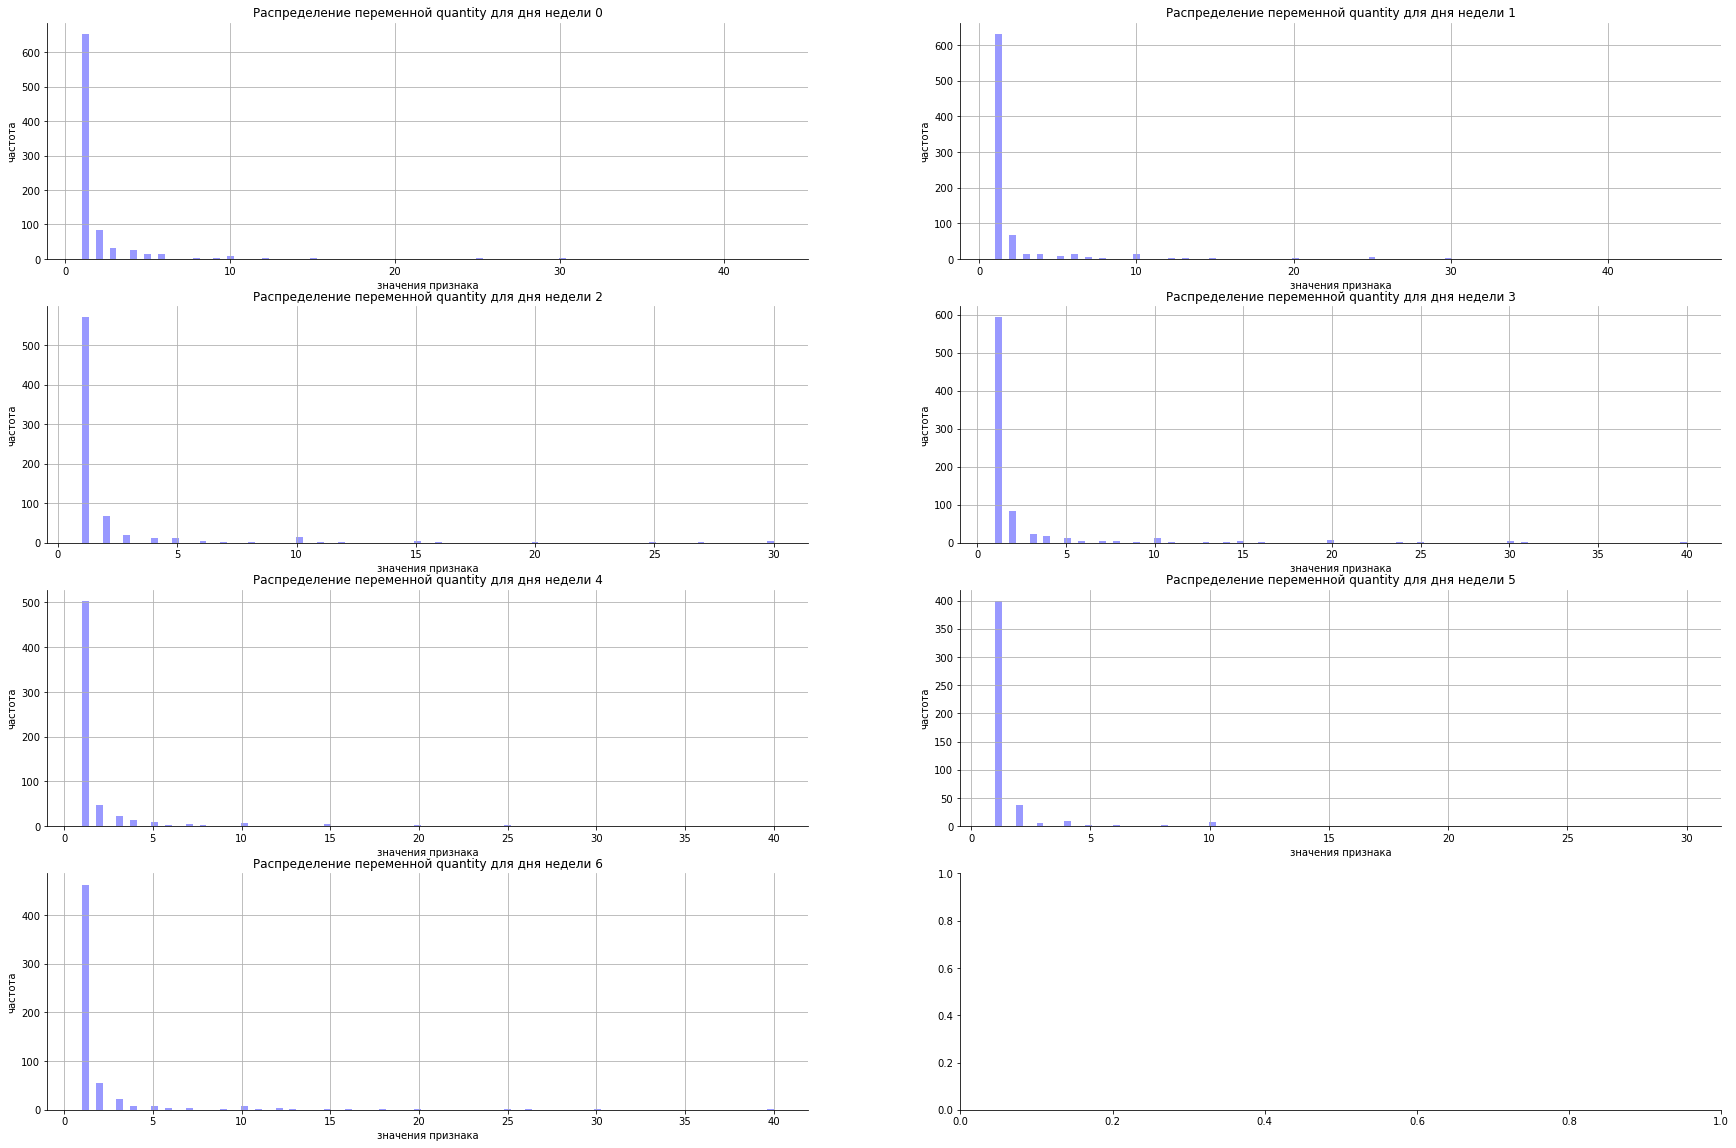

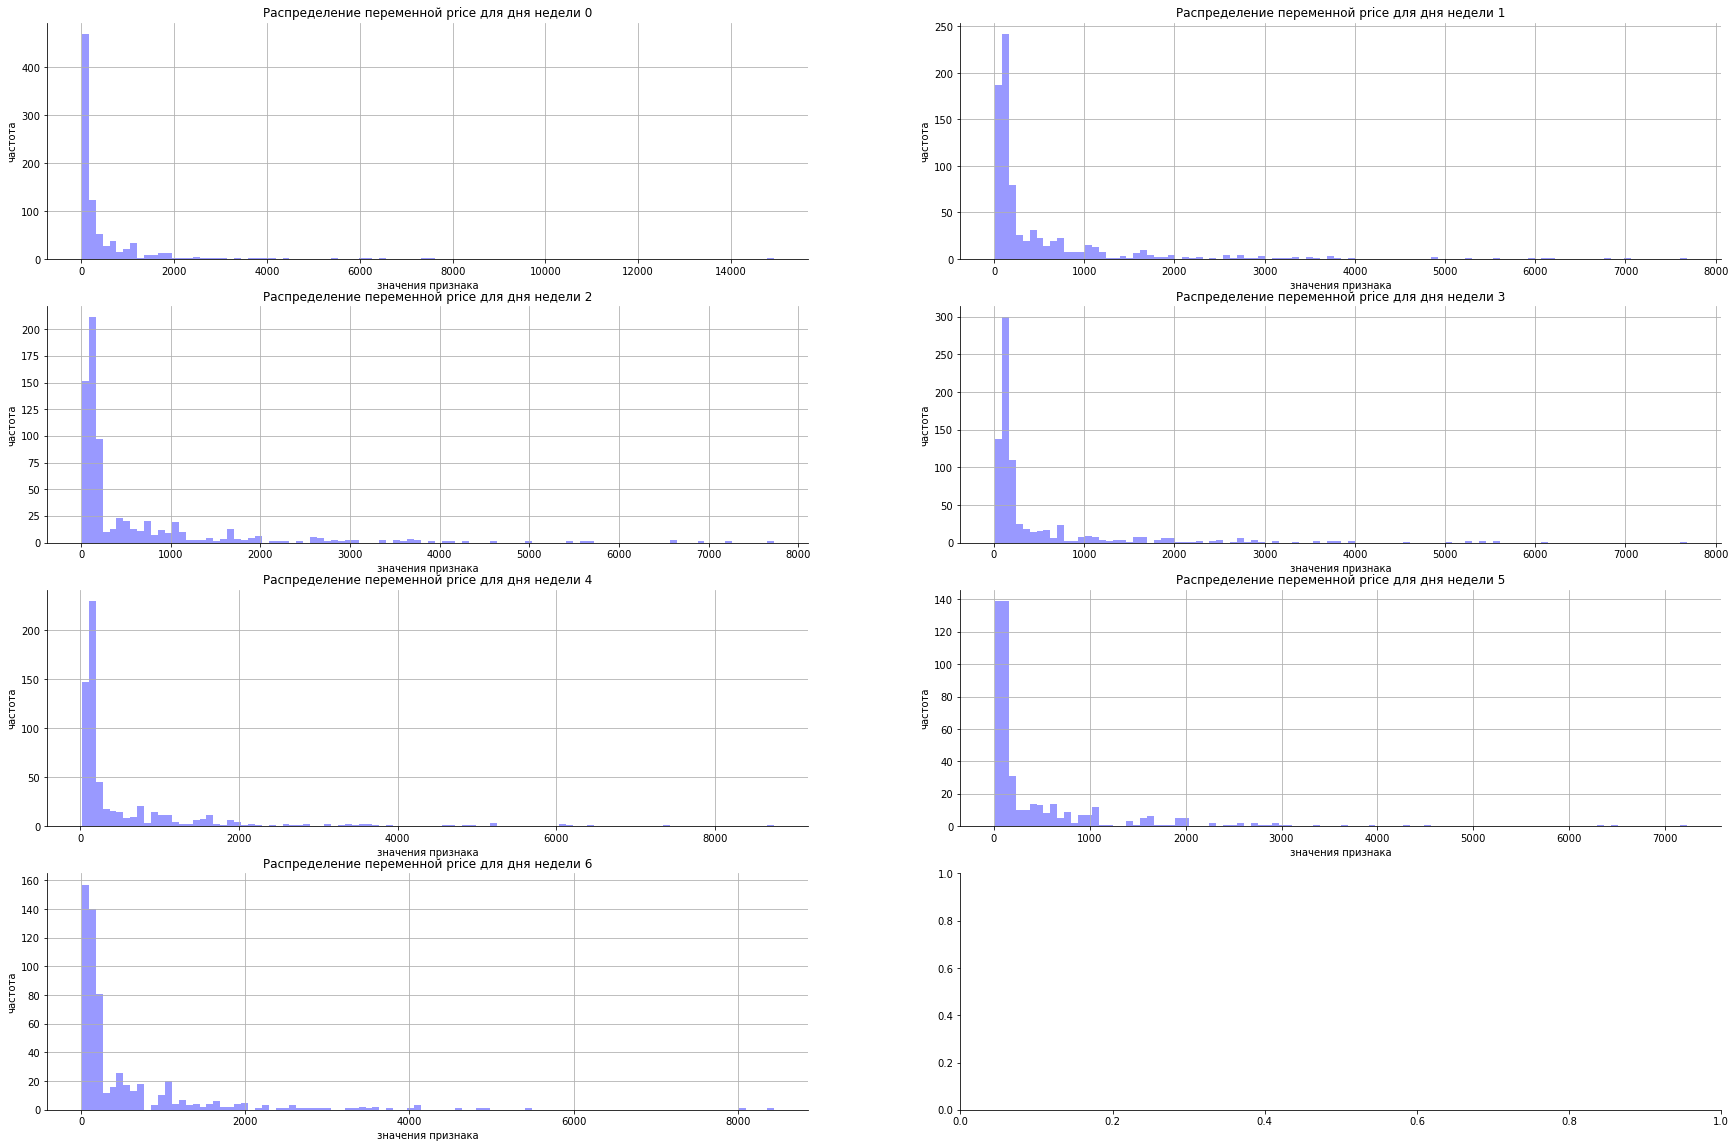

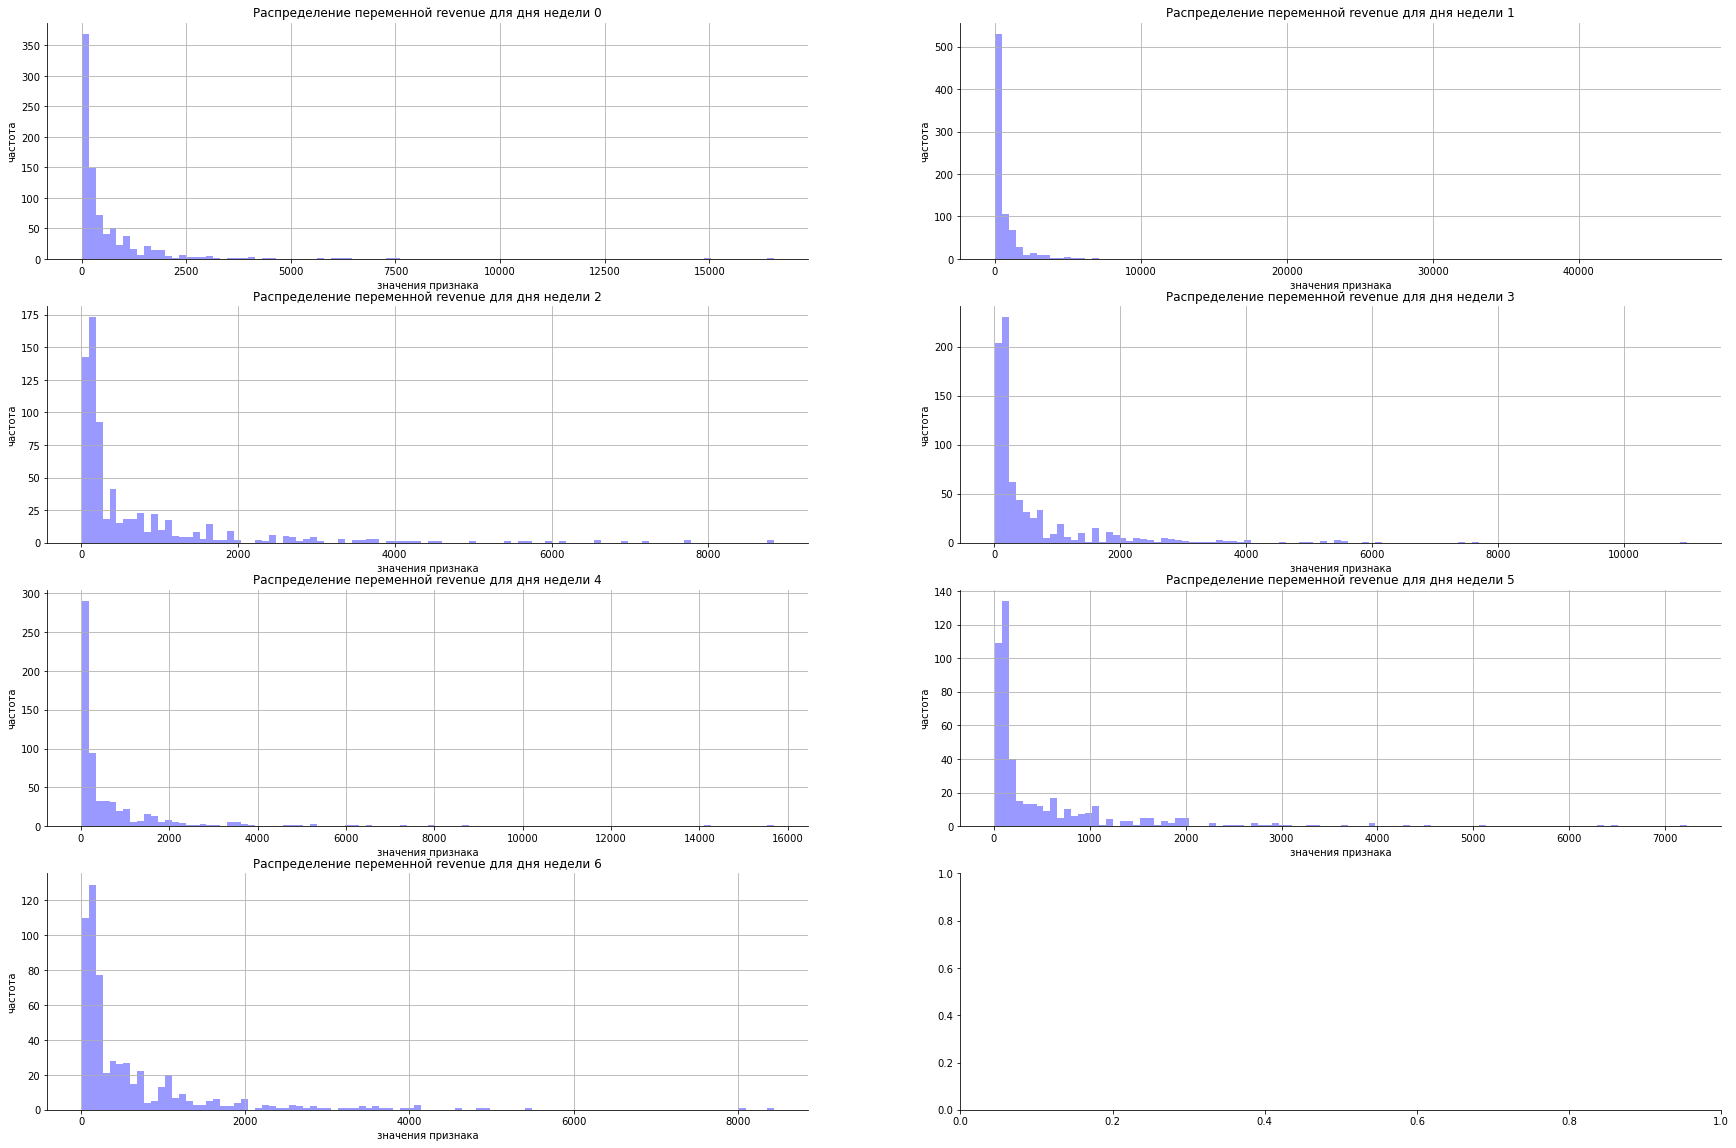

In [279]:
# функция для построения гистограммы 
def plotOne(df, col, day, axI): 
    sns.distplot(df[col], bins = 100, color = 'blue', kde = False, kde_kws = {'bw':0.1}, ax = axI)
    axI.set_xlabel('значения признака')
    axI.set_ylabel('частота')
    axI.set_title(f'Распределение переменной {col} для дня недели {day}')
    axI.grid()
    sns.despine()

    
# функция с вызовом subplots() располагает гистограммы по каждой переменной и дню недели рядом 

def plot1(df, col, day):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize = (30, 20))
    plotOne(df.query(f'weekday == {day[0]}'), col, day[0], ax1)
    plotOne(df.query(f'weekday == {day[1]}'), col, day[1], ax2)
    plotOne(df.query(f'weekday == {day[2]}'), col, day[2], ax3)
    plotOne(df.query(f'weekday == {day[3]}'), col, day[3], ax4)
    plotOne(df.query(f'weekday == {day[4]}'), col, day[4], ax5)
    plotOne(df.query(f'weekday == {day[5]}'), col, day[5], ax6)
    plotOne(df.query(f'weekday == {day[6]}'), col, day[6], ax7)
    
    

# формируем 2 списка с названием переменных (колонок) и упорядоченными номерами дней недели   

columns = df[['quantity', 'price', 'revenue']].columns
day = sorted(df['weekday'].unique())


# перебираем признаки в цикле и для каждой рисуем гистограммы рядом 
for col in columns:
    plot1(df, col, day)

- Для всех дней недели характерно **поштучное потребление**.
- Понедельник, вторник и четверг выделяются тем, что в эти дни чаще покупается **несколько товаров.**
---
- Самые **дешевые товары** чаще всего заказывают в понедельник.
- В целом, практически все товары укладываются в **ценовой диапазон** до 2 000 р.
---
- Выручка также чаще всего **не пересекает** границу 2 000 р.
- Вторник чаще всего приносит **небольшую выручку**, в отличие от остальных дней недели.

<a class='anchor' id='id-section19'/>

### [Вывод](#id-section46)

В связи с тем, что у нас не было принятой категоризации товаров, мы решили опереться на опыт другого интернет-магазина и работать с такими же категориями товаров, которые есть у него. 

- С помощью парсинга мы составили каталог товаров с их категориями, затем вызвали модель машинного обучения, обучили ее на товарах из каталога предсказывать категории (скоринг показал, что модель прогнозирует категории для товаров в каталоге достаточно точно), и после этого обученную модель применили к товарам из нашего магазина.

- В результате модель присвоила товарам **категории**: "Текстиль и гардероб", "Все для кухни", "Для дома и сада" (для дальнейшей проверки гипотез нам интересна именно последняя категория). 

Таким образом, мы сегментировали покупателей **по категориям товаров**, которые они приобретают.

---
При оценке того, **насколько ярко проявляют себя сегменты по товарным категориям в данных**, мы увидели, что:
- Больше всего заказов было сделано в категории "Все для кухни", меньше всего - в категории "Для дома и сада".
- "Все для кухни" лидирует и по количеству покупаемых товаров (в среднем примерно по 3 товара). Важно отметить, что эта категория содержит больше всего дешевых товаров (до 500 р.).
- Категория "Текстиль и гардероб" самая дорогая по средним ценам на товары (805 р.) и по выручке (940 р.). В эту категорию попало больше всего дорогих товаров.
- Категория "Для дома и сада" занимает средние позиции по всем характеристикам.
- При этом гистограммы распределения показали, что для всех категорий товаров характерна поштучная покупка.
- В целом, для всех категорий большинство товаров имеют цены до 1000 р.

---
Также мы самостоятельно сегментировали покупателей **по дням недели совершения покупок** и увидели:
- Больше всего заказов было сделано в понедельник и вторник, также в эти дни заказывают больше всего товаров (в среднем примерно 2). Самые дешевые товары чаще всего заказывают в понедельник.
- Меньше всего заказов - в субботу, пятницу и воскресенье (вероятно, выходные дни и вечер пятницы покупатели проводят в офлайн-магазинах). При этом по субботам покупают меньше всего товаров.
- Логично, что в плане выручки данные показали тот же результат: больше всего выручки с заказов было получено в понедельник и вторник, а меньше всего - в выходные дни и пятницу.
- Важно отметить, что для всех дней недели характерно поштучное потребление.
- В целом, выручка по всем дням чаще всего не пересекает границу 2 000 р.

---
Дополнительно мы сегментировали покупателей при помощи алгоритма машинного обучения `K-Means`, с учетом построения дендрограммы было принято решение разделить покупателей на 3 кластера. 

**Кластер 0 отличился следующими признаками:**
- покупатели приносят меньше всего выручки (в среднем 957 р. с заказа),
- четкого разделения покупателей на годовые кварталы не наблюдается, но с большей вероятностью они скорее делают покупки в 4 квартале,
- покупатели делают покупки по будням,
- покупают товары категории "Все для кухни".

**Отличительные черты кластера 1:**
- покупатели приносят максимальное количество всего выручки (в среднем 1418 р. с заказа, что больше, чем в остальных кластерах),
- снова не наблюдается четкого разделения покупателей на годовые кварталы, но с большей вероятностью они делают покупки в 4 квартале (как в кластере 0),
- покупатели делают заказы по будням,
- покупают товары категории "Текстиль и гардероб".

**Отличительные черты кластера 2:**
- покупатели приносят среднее количество выручки по сравнению с двумя другими кластерами (1124 р.),
- с большей вероятностью покупатели делают заказы во 2 квартале,
- покупатели делают покупки по будням,
- покупатели заказывают товары категории "Для дома и сада".

Из вышеизложенного мы можем констатировать, что алгоритм выделил кластеры покупателей главным образом на основе того, товаров из какой категории содержится больше всего в их заказах. Это значит, что ранее мы верно выделили сегменты покупателей на основании товарных категорий самостоятельно. 

<a class='anchor' id='id-section20'/>

## [Шаг 5. Проверим статистические гипотезы](#id-section47)

<a class='anchor' id='id-section21'/>

### [Гипотеза о равенстве среднего чека у покупателей товаров "Для дома и сада" в зимний и летний сезоны](#id-section48)

Создадим новый столбец в данных с месяцем покупки.

In [280]:
df['month'] = df['date'].dt.month


Сформируем срез данных с товарной категорий "Для дома и сада".

Для каждого заказа в категории "Для дома и сада" выведем суммарную выручку (для последующего подсчета среднего чека), дату, месяц, идентификатор покупателя. Потом эта таблица (`ordersHouseAndGarden`) позволит нам сделать срезы по летнему и зимнему сезонам.

In [281]:
dfHouseAndGarden = df.query('category == "Для дома и сада"') 

ordersHouseAndGarden = dfHouseAndGarden.groupby('order_id').agg({'date': 'min', 'customer_id': \
                                                                 'min', 'revenue': 'sum', 'month': 'min'})

display(ordersHouseAndGarden.head())

,date,customer_id,revenue,month
order_id,,,,
13547,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,684.0,10
14480,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,359.0,10
14487,2018-10-17 16:00:00,585b1d92-f760-41f1-80bd-824fb827f34a,398.0,10
14496,2018-10-25 01:00:00,9669d757-8412-4d30-93b6-30db2ac9cac1,150.0,10
14497,2018-10-26 17:00:00,1b09d659-6aff-4be8-b548-77e949f60309,303.0,10


В связи с тем, что заказы, сделанные зимой и летом, разные, уникальные - мы не можем сказать, что перед нами зависимые (парные) выборки. Следовательно, нам нужно проверить гипотезу о равенстве средних для двух разных выборок.

- **Гипотезу H₀ сформулируем так:** размеры среднего чека в заказах товаров "Для дома и сада" в зимний и летний сезоны равны (то есть одинаковые).
- **Гипотеза H₁:** размеры среднего чека в заказах товаров "Для дома и сада" в зимний и летний сезоны различаются.

Для проверки гипотезы **H₀** мы проведем t-тест методом `scipy.stats.ttest_ind()` из библиотеки `scipy.stats`, куда передадим два среза данных с выручками от заказов в зимний и летний сезоны. 

**Критический уровень статистической значимости** зададим значением 0.05 (5%), так как мы доверяем этому общепринятому пороговому значению. 

- Если наблюдаемое на выборках значение `pvalue` попадет в эту зону, у нас будет основание отвергнуть нулевую гипотезу.

- Если значение `pvalue` попадет в зону «Не получилось отвергнуть нулевую гипотезу», то оснований отвергать нулевую гипотезу нет. Будем считать, что эмпирически полученные данные не противоречат H₀.

Однако прежде чем произвести проверку гипотез через t-критерий Стьюдента, сделаем проверку дисперсий выборок, чтобы понять, с каким параметром `equal_var` (`True` или `False`) использовать метод проверки `ttest_ind`.

In [282]:
# формируем 2 выборки с выручкой по заказам "Для дома и сада" зимой и летом
winterOrdersHouseAndGarden = ordersHouseAndGarden.query('month in (12, 1, 2)')['revenue']
summerOrdersHouseAndGarden = ordersHouseAndGarden.query('month in (6, 7, 8)')['revenue']

# смотрим на дисперсии в выборках
display([np.var(x, ddof = 1) for x in [winterOrdersHouseAndGarden, summerOrdersHouseAndGarden]])

[1573332.1766117127, 1363532.4913829933]

In [283]:
# проводим t-тест

alpha = 0.05 

results = st.ttest_ind(winterOrdersHouseAndGarden, summerOrdersHouseAndGarden, equal_var = False)

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу') 

'p-значение:'

0.7380200663968738

'Не получилось отвергнуть нулевую гипотезу'

- Судя по полученному значению `pvalue` (0.74), это явно слишком большая вероятность, чтобы делать вывод о значимом различии между размерами среднего чека.
- Таким образом, эмпирически полученные данные **не противоречат гипотезе H₀**, и мы можем считать, что размеры среднего чека в заказах товаров "Для дома и сада" в зимний и летний сезоны одинаковые (хотя мы ожидали, что в летний сезон средний чек будет больше - здесь явно виден просчет в работе интернет-магазина). 
---
Учитывая полученный необычный результат при проверке гипотез, мы решили посмотреть на общий размер выручки и средний чек в зимний и летний сезон (по всем данным), а также размер выручки и средний чек в зимний и летний сезон в заказах товаров "Для дома и сада" (чтобы увидеть, какими данными оперировал t-тест).

In [284]:
# формируем таблицу с заказами по общим данным (аналогично ordersHouseAndGarden). 
# для проверки следующей гипотезы добавим еще столбец с днем недели каждого заказа 
orders = df.groupby('order_id').agg({'date': 'min', 'customer_id': 'min', 'revenue': 'sum', \
                                     'month': 'min', 'weekday': 'min'})
display(orders.head())


display('Общая картина: ')

# смотрим выручку и ср.чек по всем заказам зимой и летом 
display('Выручка по всем заказам в зимний сезон: ' + str(orders.query('month in (12, 1, 2)')['revenue'].sum()),
'Выручка по всем заказам в летний сезон: ' + str(orders.query('month in (6, 7, 8)')['revenue'].sum()))
display('Ср.чек по всем заказам в зимний сезон: ' + str(orders.query('month in (12, 1, 2)')['revenue'].mean()),
'Ср.чек по всем заказам в летний сезон: ' + str(orders.query('month in (6, 7, 8)')['revenue'].mean()))


display('Чем оперировал t-тест: ')

# смотрим выручку и ср.чек по заказам "Для дома и сада" зимой и летом 
display('Выручка по заказам "Для дома и сада" в зимний сезон: ' + str(winterOrdersHouseAndGarden.sum()),
'Выручка по заказам "Для дома и сада" в летний сезон: ' + str(summerOrdersHouseAndGarden.sum()))

display('Ср.чек по заказам "Для дома и сада" в зимний сезон: ' + str(winterOrdersHouseAndGarden.mean()),
'Ср.чек по заказам "Для дома и сада" в летний сезон: ' + str(summerOrdersHouseAndGarden.mean()))


,date,customer_id,revenue,month,weekday
order_id,,,,,
12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,375.0,6,6
13547,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,684.0,10,4
14480,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,359.0,10,1
14481,2018-10-02 17:00:00,49b9c587-c19e-4481-bace-967aeac357fa,600.0,10,1
14482,2018-10-07 12:00:00,43993fd2-20c9-44f7-8634-cf0aee26df4f,376.0,10,6


'Общая картина: '

'Выручка по всем заказам в зимний сезон: 846691.0'

'Выручка по всем заказам в летний сезон: 586036.0'

'Ср.чек по всем заказам в зимний сезон: 1163.0370879120878'

'Ср.чек по всем заказам в летний сезон: 1105.7283018867925'

'Чем оперировал t-тест: '

'Выручка по заказам "Для дома и сада" в зимний сезон: 127773.0'

'Выручка по заказам "Для дома и сада" в летний сезон: 112648.0'

'Ср.чек по заказам "Для дома и сада" в зимний сезон: 998.2265625'

'Ср.чек по заказам "Для дома и сада" в летний сезон: 946.6218487394958'

- Мы видим, что **зимой выручка по всем заказам больше, чем летом**. А вот **средний чек практически идентичен** (1163 р. и 1105 р.). Вероятно, влияет то, что онлайн-шоппинг более привлекателен в холода, когда не хочется лишний раз выходить из дома, покупатели делают больше заказов в количественном эквиваленте, но при этом не изменяют своим потребительским привычкам и набирают заказы с привычным средним чеком. 
- В категории товаров "Для дома и сада" ситуация аналогичная: **зимой выручка** незначительно, но все-таки **больше, чем летом**, а **размеры среднего чека близки** (998 р. зимой и 946 р. летом). Неудивительно, почему t-тест не почувствовал между ними статистически важной разницы.

<a class='anchor' id='id-section22'/>

### [Вывод](#id-section49)

- Проверка гипотез H₀ и H₁ через t-критерий Стьюдента показала, что **размеры среднего чека в заказах товаров "Для дома и сада" в зимний и летний сезоны не различаются** (хотя мы, естественно, ожидали, что в летний сезон средний чек будет больше).

Учитывая полученный необычный результат, мы вычислили общий размер выручки и средний чек в зимний и летний сезоны (по всем данным), а также размер выручки и средний чек в зимний и летний сезоны в заказах товаров "Для дома и сада" (чтобы увидеть, какими данными оперировал t-тест).

- Оказалось, что **зимой выручка по всем заказам больше, чем летом**. А вот **средний чек практически идентичен** (1163 р. и 1105 р.). Вероятно, влияет то, что онлайн-шоппинг более привлекателен в холода, когда не хочется лишний раз выходить из дома, покупатели делают больше заказов в количественном эквиваленте, но при этом не изменяют своим потребительским привычкам и набирают заказы с привычным средним чеком. 

- В категории товаров "Для дома и сада" ситуация аналогичная: **зимой выручка** незначительно, но все-таки **больше, чем летом**, а **размеры среднего чека близки** (998 р. зимой и 946 р. летом). Неудивительно, почему t-тест не почувствовал между ними статистически важной разницы.

---

Таким образом, **у сегмента покупателей товаров категории "Для дома и сада" обнаружилась тревожная тенденция**: 
- выручка зимой немного выше, чем летом (хотя мы ожидали, что в летний сезон будут заказывать больше товаров для озеленения, и выручка будет больше зимней). Но это можно частично списать на то, что летом покупатели предпочитают оффлайн-шоппинг, тем более, иногда важно лично в магазине оценить внешний вид растения перед покупкой.
- летний средний чек, по логике, должен обгонять зимний (но он такой же). Это значит, что интернет-магазин не обладает достаточно разнообразным сезонным летним ассортиментом. 

Чтобы интернет-магазин мог **получать больше выручки с сегмента покупателей товаров "Для дома и сада" в летний сезон**, нужно увеличивать величину среднего чека (расширять ассортимент) или количество заказов (стимулировать покупателей делать больше заказов путем организации рекламных кампаний, акций и скидок). 

<a class='anchor' id='id-section23'/>

### [Гипотеза о равенстве среднего чека у покупателей по будним и выходным дням](#id-section50)



У нас уже сформирована таблица `orders`, которая для каждого заказа показывает суммарную выручку (для последующего подсчета среднего чека), дату, месяц, идентификатор покупателя и день недели. Потом эта таблица позволит нам сделать срезы по заказам в будние и выходные дни.

In [285]:
display(orders.head())

,date,customer_id,revenue,month,weekday
order_id,,,,,
12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,375.0,6,6
13547,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,684.0,10,4
14480,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,359.0,10,1
14481,2018-10-02 17:00:00,49b9c587-c19e-4481-bace-967aeac357fa,600.0,10,1
14482,2018-10-07 12:00:00,43993fd2-20c9-44f7-8634-cf0aee26df4f,376.0,10,6


В связи с тем, что заказы, сделанные в будние и выходные дни, разные, уникальные - мы не можем сказать, что перед нами зависимые (парные) выборки. Следовательно, нам нужно проверить гипотезу о равенстве средних для двух разных выборок.

- **Гипотезу H₀ сформулируем так:** размеры среднего чека в заказах товаров по будним и выходным дням равны (то есть одинаковые).
- **Гипотеза H₁:** размеры среднего чека в заказах товаров по будним и выходным дням различаются.

Для проверки гипотезы **H₀** мы проведем t-тест методом `scipy.stats.ttest_ind()` из библиотеки `scipy.stats`, куда передадим два среза данных с выручками от заказов в будние и выходные дни. 

**Критический уровень статистической значимости** зададим значением 0.05 (5%), так как мы доверяем этому общепринятому пороговому значению. 

- Если наблюдаемое на выборках значение `pvalue` попадет в эту зону, у нас будет основание отвергнуть нулевую гипотезу.

- Если значение `pvalue` попадет в зону «Не получилось отвергнуть нулевую гипотезу», то оснований отвергать нулевую гипотезу нет. Будем считать, что эмпирически полученные данные не противоречат H₀.

Однако прежде чем произвести проверку гипотез через t-критерий Стьюдента, сделаем проверку дисперсий выборок, чтобы понять, с каким параметром `equal_var` (`True` или `False`) использовать метод проверки `ttest_ind`.

In [286]:
# формируем 2 выборки с выручкой по заказам в будние и выходные дни
weekdayOrders = orders.query('weekday not in (5, 6)')['revenue']
weekendOrders = orders.query('weekday in (5, 6)')['revenue']

# смотрим на дисперсии в выборках
display([np.var(x, ddof = 1) for x in [weekdayOrders, weekendOrders]])

[3819411.95810885, 1322683.023034636]

In [287]:
# проводим t-тест

alpha = 0.05 

results = st.ttest_ind(weekdayOrders, weekendOrders, equal_var = False)

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу') 

'p-значение:'

0.001672603106153417

'Отвергаем нулевую гипотезу'

- Полученное значение `pvalue` дает нам основание **отвергнуть гипотезу H₀** о равенстве размеров среднего чека. 
- Следовательно, эмпирически полученные данные **не противоречат гипотезе H₁**, и размеры среднего чека в заказах товаров по будним и выходным дням различаются.
---

Посмотрим на размер выручки по будним и выходным дням. Но так как в году больше будних дней, чем выходных, просто сложить `revenue` и сравнивать суммы будет некорректно. Поэтому выведем усредненный размер выручки по всем заказам в 1 будний день (разделим сумму по revenue по будням на 5), а также в 1 выходной день (разделим сумму по revenue по выходным на 2).

Также проверим, какими данными оперировал t-тест: посмотрим на размер среднего чека по всем заказам в будни и выходные. 

In [288]:
display('Общая картина: ')

display('Средняя выручка по всем заказам в 1 будний день: ' + str(weekdayOrders.sum() / 5),
'Средняя выручка по всем заказам в 1 выходной день: ' + str(weekendOrders.sum() / 2))

display('Чем оперировал t-тест: ')

display('Ср.чек по всем заказам в будни: ' + str(weekdayOrders.mean()),
'Ср.чек по всем заказам в выходные: ' + str(weekendOrders.mean()))


'Общая картина: '

'Средняя выручка по всем заказам в 1 будний день: 526375.2'

'Средняя выручка по всем заказам в 1 выходной день: 304560.0'

'Чем оперировал t-тест: '

'Ср.чек по всем заказам в будни: 1219.025474756832'

'Ср.чек по всем заказам в выходные: 1020.3015075376884'

- Мы видим, что в среднем **в 1 будний день покупатели приносят интернет-магазину значительно больше денег, чем в выходной**. Думаем, это связано с тем, что в будние (рабочие) дни покупателям просто некогда посещать магазины оффлайн, и ради экономии времени они предпочитают заказывать товары онлайн. А в выходные дни они, наоборот, идут в магазины лично, отнимая выручку у интернет-магазина. 

- Также **в будние дни у покупателей средний чек ощутимо выше, чем в выходные** (1219 р. против 1020 р.), t-тест это зафиксировал. Возможно, вследствие того, что в выходные дни интернет-магазин конкурирует с шоппингом оффлайн (и проигрывает в этой борьбе), покупатели большую часть товаров покупают оффлайн, из-за чего в интернет-магазине они набирают заказы с меньшим средним чеком, чем могли бы. 

<a class='anchor' id='id-section24'/>

### [Вывод](#id-section51)

- Проверка гипотез H₀ и H₁ через t-критерий Стьюдента показала, что **размеры среднего чека в заказах у покупателей по будним и выходным дням различаются**.

Дополнительно мы посмотрели на усредненный размер выручки по всем заказам в 1 будний день и в 1 выходной день, а также проверили, какими данными оперировал t-тест: вывели размер среднего чека по всем заказам в будни и выходные. Этот анализ позволил нам прийти к таким результатам:

- В среднем **в 1 будний день покупатели приносят интернет-магазину значительно больше денег, чем в выходной**. Думаем, это связано с тем, что в будние (рабочие) дни покупателям просто некогда посещать магазины оффлайн, и ради экономии времени они предпочитают заказывать товары онлайн. А в выходные дни они, наоборот, идут в магазины лично, отнимая выручку у интернет-магазина. 

- Также **в будние дни у покупателей средний чек ощутимо выше, чем в выходные** (1219 р. против 1020 р.), t-тест это зафиксировал. Возможно, вследствие того, что в выходные дни интернет-магазин конкурирует с шоппингом оффлайн (и проигрывает в этой борьбе), покупатели большую часть товаров покупают оффлайн, из-за чего в интернет-магазине они набирают заказы с меньшим средним чеком, чем могли бы. 

---

Таким образом, мы увидели яркую сегментацию покупателей по будним и выходным дням. Это значит, что **сейчас интернет-магазин проигрывает в борьбе с оффлайн-шоппингом в выходные дни** (выручка и средний чек ниже, чем в будни). 

- Необходимо принять меры для того, чтобы в выходные дни покупатели товаров отдавали приоритет интернет-магазину (например, проводить акции выходного дня со сниженными ценами на товары, создавать удобные условия для доставки, расширять территориальные границы доставки, ведь зачастую многие покупатели заказывают товары по будням к себе на работу, потому что на домашний адрес доставка просто не распространяется).

<a class='anchor' id='id-section103'/>

### [Гипотеза о равенстве среднего чека у покупателей в каждой паре из трех кластеров](#id-section104)

У нас уже сформирована таблица `ml_orders`, которая для каждого кластера показывает статистику по выручке.

In [289]:
display(ml_orders.head())

,revenue,quarter_1,quarter_2,quarter_3,quarter_4,week_days_ends_weekday,week_days_ends_weekend,category_Все для кухни,category_Для дома и сада,category_Текстиль и гардероб,claster
order_id,,,,,,,,,,,
12624,375.0,0,1,0,0,0,1,1,0,0,0
13547,684.0,0,0,0,1,1,0,0,1,0,2
14480,359.0,0,0,0,1,1,0,0,1,0,2
14481,600.0,0,0,0,1,1,0,0,0,1,1
14482,376.0,0,0,0,1,0,1,0,0,1,1


В связи с тем, что заказы, сделанные в разных кластерах, уникальные - мы не можем сказать, что перед нами зависимые (парные) выборки. Следовательно, нам нужно проверить гипотезу о равенстве средних для трех пар разных выборок.

- **Гипотезу H₀ сформулируем так:** размеры среднего чека в заказах в кластерах 0 и 1, 1 и 2, 0 и 2 равны (то есть одинаковые).
- **Гипотеза H₁:** размеры среднего чека в заказах в кластерах 0 и 1, 1 и 2, 0 и 2 различаются.

Для проверки гипотезы **H₀** для каждой пары кластеров мы проведем t-тест методом `scipy.stats.ttest_ind()` из библиотеки `scipy.stats`, куда 3 раза передадим по 2 среза данных с выручками от заказов в кластерах. 

**Критический уровень статистической значимости** зададим значением 0.05 (5%), так как мы доверяем этому общепринятому пороговому значению. Однако в данном случае происходит множественная проверка гипотез, поэтому мы **применяем поправку Бонферрони** - поделим принятый уровень значимости на число сравнений (3). 

- Если наблюдаемое на выборках значение `pvalue` попадет в эту зону, у нас будет основание отвергнуть нулевую гипотезу.

- Если значение `pvalue` попадет в зону «Не получилось отвергнуть нулевую гипотезу», то оснований отвергать нулевую гипотезу нет. Будем считать, что эмпирически полученные данные не противоречат H₀.

In [290]:
# формируем 3 выборки с выручкой по каждому кластеру
claster0 = ml_orders.query('claster == 0')['revenue']
claster1 = ml_orders.query('claster == 1')['revenue']
claster2 = ml_orders.query('claster == 2')['revenue']

In [291]:
# проводим t-тест

alpha = 0.05 # критический уровень статистической значимости

results_01 = st.ttest_ind(
    claster0, 
    claster1)

results_12 = st.ttest_ind(
    claster1, 
    claster2)

results_02 = st.ttest_ind(
    claster0, 
    claster2)

bonferroni_alpha = alpha / 3  # произведено три сравнения

display('p-значение для сравнения кластеров 0 и 1: ', results_01.pvalue)
display('p-значение для сравнения кластеров 1 и 2: ', results_12.pvalue)
display('p-значение для сравнения кластеров 0 и 2: ', results_02.pvalue)

if (results_01.pvalue < bonferroni_alpha):
    display("Отвергаем нулевую гипотезу для сравнения кластеров 0 и 1")
else:
    display("Не получилось отвергнуть нулевую гипотезу для сравнения кластеров 0 и 1")

if (results_12.pvalue < bonferroni_alpha):
    display("Отвергаем нулевую гипотезу для сравнения кластеров 1 и 2")
else:
    display("Не получилось отвергнуть нулевую гипотезу для сравнения кластеров 1 и 2")

if (results_02.pvalue < bonferroni_alpha):
    display("Отвергаем нулевую гипотезу для сравнения кластеров 0 и 2")
else:
    display("Не получилось отвергнуть нулевую гипотезу для сравнения кластеров 0 и 2")

'p-значение для сравнения кластеров 0 и 1: '

1.3396207373421525e-08

'p-значение для сравнения кластеров 1 и 2: '

0.0027570542809584905

'p-значение для сравнения кластеров 0 и 2: '

0.039797382640830596

'Отвергаем нулевую гипотезу для сравнения кластеров 0 и 1'

'Отвергаем нулевую гипотезу для сравнения кластеров 1 и 2'

'Не получилось отвергнуть нулевую гипотезу для сравнения кластеров 0 и 2'

- Наблюдаемые данные не подтверждают наличие разницы в размере среднего чека только между кластерами 0 и 2.

<a class='anchor' id='id-section105'/>

### [Вывод](#id-section106)

- Проверка гипотез H₀ и H₁ через t-критерий Стьюдента показала, что **размеры среднего чека в заказах у покупателей различаются в кластерах 0 и 1, 1 и 2**.
- Кластер 0 характеризовался товарами "Все для кухни", наименьшим средним чеком, и покупками в 4 квартале, кластер 1 - товарами "Текстиль и гардероб" с максимальным средним чеком, а кластер 2 - товарами "Для дома и сада", средней величиной среднего чека по сравнению с другими кластерами, покупками во 2 квартале (весной).
- Это значит, что клиенты приходят в интернет-магазин, скорее всего, за покупкой текстильных товаров.
- Необходимо провести работу с сегментами покупателей из кластеров 0 и 2, чтобы средний чек от них увеличивался. 

<a class='anchor' id='id-section25'/>

## [Шаг 6. Сформулируем общие выводы и рекомендации по разработке персонализированных предложений для покупателей](#id-section52)

**Исследовательский анализ данных** позволил нам установить:

- Данные для проведения исследования были представлены за год: с 1 октября 2018 г. по 31 октября 2019 г. и имеют тенденцию к сезонности. В частности, самое большое количество заказов наблюдается весной - в начале лета, также есть небольшой всплеск по заказам в июне. Количество заказов достаточно высокое перед новогодними праздниками, но резко падает в январе (вероятно, покупатели приобретают товары в качестве подарков, а также украшения, искусственные елки. Соответственно, в январе спрос на эти товары падает). Оживление наступает сразу после новогодних праздников, и с середины января появляется рост.

- В подавляющем большинстве случаев покупатели приобретают товары поштучно. 

- Чаще всего цена товара в интернет-магазине укладывается в диапазон до 500 р. Однако много и товаров с ценой до 1 500 р. В ассортименте есть и дорогие товары (например, максимальная цена товара "Сушилка уличная Leifheit 85210 LINOMATIC V 400" равна 14 917 р.).

- Покупатель в среднем приносит нам до 734 р. выручки. При этом полученная интернет-магазином выручка практически всегда укладывается в диапазон до 10 000 р.

---
Построение **матрицы корреляций** показало следующий результат:

- Наиболее сильная корреляция наблюдается между выручкой и ценой товара (связь прямая положительная - чем дороже стоит товар, тем больше выручка). 
- Получается, что количество товаров практически не оказывает влияния на выручку (коэффициент = 0.23). 
- Цена также не влияет на количество покупаемого товара (коэффициент = -0.11). Видимо, из-за того, что в основном ассортименте магазина только недорогие товары. 

---
В связи с тем, что у нас не было принятой категоризации товаров, мы решили опереться на опыт другого интернет-магазина и работать с такими же категориями товаров, которые есть у него. 

- С помощью парсинга мы составили каталог товаров с их категориями, затем вызвали модель машинного обучения, обучили ее на товарах из каталога предсказывать категории (скоринг показал, что модель прогнозирует категории для товаров в каталоге достаточно точно), и после этого обученную модель применили к товарам из нашего интернет-магазина.

- В результате модель присвоила товарам **категории**: "Текстиль и гардероб", "Все для кухни", "Для дома и сада". 

Таким образом, мы сегментировали покупателей **по категориям товаров**, которые они приобретают.

---
При оценке того, **насколько ярко проявляют себя сегменты покупателей по товарным категориям**, мы пришли к выводам о том, что:
- Больше всего заказов было сделано в категории "Все для кухни", меньше всего - в категории "Для дома и сада".
- "Все для кухни" лидирует и по количеству покупаемых товаров (в среднем примерно по 3 товара). Важно отметить, что эта категория содержит больше всего дешевых товаров (до 500 р.).
- Категория "Текстиль и гардероб" самая дорогая по средним ценам на товары (805 р.) и по выручке (940 р.). В эту категорию попало больше всего дорогих товаров.
- Категория "Для дома и сада" занимает средние позиции по всем характеристикам.
- При этом гистограммы распределения снова показали, что для всех категорий товаров характерна поштучная покупка.

---
Также мы сегментировали покупателей **по дням недели совершения покупок** и увидели:
- Больше всего заказов было сделано в понедельник и вторник, также в эти дни заказывают больше всего товаров (в среднем примерно 2). Самые дешевые товары чаще всего заказывают в понедельник.
- Меньше всего заказов - в субботу, пятницу и воскресенье (вероятно, выходные дни и вечер пятницы покупатели проводят в офлайн-магазинах). При этом по субботам покупают меньше всего товаров.
- Логично, что в плане выручки данные показали тот же результат: больше всего выручки с заказов было получено в понедельник и вторник, а меньше всего - в выходные дни и пятницу.
- Важно отметить, что для всех дней недели характерно поштучное потребление.

---
Дополнительно мы сегментировали покупателей при помощи алгоритма машинного обучения `K-Means`, с учетом построения дендрограммы было принято решение разделить покупателей на 3 кластера. 

**Кластер 0 отличился следующими признаками:**
- покупатели приносят меньше всего выручки (в среднем 957 р. с заказа),
- четкого разделения покупателей на годовые кварталы не наблюдается, но с большей вероятностью они скорее делают покупки в 4 квартале,
- покупатели делают покупки по будням,
- покупают товары категории "Все для кухни".

**Отличительные черты кластера 1:**
- покупатели приносят максимальное количество всего выручки (в среднем 1418 р. с заказа, что больше, чем в остальных кластерах),
- снова не наблюдается четкого разделения покупателей на годовые кварталы, но с большей вероятностью они делают покупки в 4 квартале (как в кластере 0),
- покупатели делают заказы по будням,
- покупают товары категории "Текстиль и гардероб".

**Отличительные черты кластера 2:**
- покупатели приносят среднее количество выручки по сравнению с двумя другими кластерами (1124 р.),
- с большей вероятностью покупатели делают заказы во 2 квартале,
- покупатели делают покупки по будням,
- покупатели заказывают товары категории "Для дома и сада".

Из вышеизложенного мы можем констатировать, что алгоритм выделил кластеры покупателей главным образом на основе того, товаров из какой категории содержится больше всего в их заказах. Это значит, что ранее мы верно выделили сегменты покупателей на основании товарных категорий самостоятельно. 

---
**Проверка статистических гипотез** через t-критерий Стьюдента показала такие результаты:

- Размеры среднего чека у покупателей товаров "Для дома и сада" в зимний и летний сезоны не различаются (хотя мы ожидали, что в летний сезон средний чек будет больше). Кроме того, зимой выручка незначительно, но все-таки выше, чем летом. 
- Размеры среднего чека в заказах у покупателей по будним и выходным дням различаются. Возможно, вследствие того, что в выходные дни интернет-магазин конкурирует с шоппингом оффлайн (и проигрывает в этой борьбе), покупатели большую часть товаров покупают оффлайн, из-за чего в интернет-магазине они набирают заказы с меньшим средним чеком, чем могли бы.
-  Размеры среднего чека в заказах у покупателей различаются в кластерах 0 и 1, 1 и 2. Это значит, что клиенты приходят в интернет-магазин, скорее всего, за покупкой текстильных товаров. Необходимо провести работу с сегментами покупателей из кластеров 0 и 2, чтобы средний чек от них увеличивался. 

---
Таким образом, мы обратили внимание на **тревожные тенденции** в работе интернет-магазина:

- У сегмента покупателей товаров "Для дома и сада" выручка зимой немного выше, чем летом (хотя мы ожидали, что в летний сезон будут заказывать больше товаров для озеленения, и выручка будет больше зимней). Но это можно частично списать на то, что летом покупатели предпочитают оффлайн-шоппинг, тем более, иногда важно лично в магазине оценить внешний вид растения перед покупкой.

- Летний средний чек покупателей товаров "Для дома и сада", по логике, должен обгонять зимний (но он такой же). Это значит, что интернет-магазин не обладает достаточно разнообразным сезонным летним ассортиментом. 

- Покупатели товаров "Все для кухни" и "Для дома и сада" (кластеры 0 и 2) отстают от кластера покупателей категории "Текстиль и гардероб" (1). Это может говорить о том, что клиенты приходят в интернет-магазин, скорее всего, за покупкой текстильных товаров.

- По яркой сегментации покупателей по будним и выходным дням мы поняли, что сейчас интернет-магазин проигрывает в борьбе с оффлайн-шоппингом в выходные дни (выручка и средний чек ниже, чем в будни). 

---
💡💡💡 Учитывая изложенное, мы можем предложить следующие **идеи и рекомендации по разработке персонализированных предложений для покупателей интернет-магазина:**

1. Всем покупателям при заходе на главную страницу интернет-магазина показывать список товаров-бестселлеров (также бестселлеры можно показывать в рамках товарных категорий). Эта мера поможет бороться с поштучным потреблением.

2. При переходе всех покупателей в "корзину" показывать список сопутствующих товаров - это также будет направлено не снижение поштучного потребления.



3. Активная персонализация работы с сегментом покупателей товаров "Для дома и сада" в летний сезон: 


- разработать более широкий ассортимент сезонных летних товаров "Для дома и сада", чем тот, который есть сейчас (для увеличения среднего чека),

- регулярно рассылать на адрес электронной почты уведомления с товарами-новинками из категории "Для дома и сада" (для увеличения количества заказов и выручки),

- предложить покупателям товаров "Для дома и сада" выгодные акции и скидки в летний сезон,

- провести масштабную рекламную кампанию, чтобы покупатели узнали об акциях и скидках.


4. Персонализация работы с кластером покупателей товаров "Все для кухни" в 4 годовом квартале:


- расширять новогодний ассортимент товаров (для увеличения среднего чека),

- предложить праздничные скидки (для увеличения количества заказов),

- увеличить количество курьеров, доставляющих заказы по будням и выходным дням в предпраздничные дни.


  
5. Персонализированная работа с сегментом покупателей выходного дня (для конкуренции с оффлайн-шоппингом):


- проводить распродажи выходного для со сниженными ценами на товары (чтобы в выходные дни покупатели товаров отдавали приоритет интернет-магазину),

- регулярное оповещение покупателей об акциях и распродажах выходного для по электронной почте,

- создать более удобные условия для доставки товаров (например, быстрая доставка в тот же день, бесплатная доставка при большом заказе),

- максимально расширять территориальные границы доставки (ведь зачастую многие покупатели заказывают товары по будням к себе на работу только потому, что на домашний адрес доставка просто не распространяется).


<a class='anchor' id='id-section26'/>

## [Шаг 7. Презентация](#id-section53)

Ссылка на презентацию: https://drive.google.com/file/d/1yKqbNKdlghrL_sRKWeYljn-AUf7mebg2/view?usp=sharing 

<a class='anchor' id='id-section27'/>

## [Шаг 8. Дашборд](#id-section54)

Ссылка на дашборд:
https://public.tableau.com/profile/maria4323#!/vizhome/FinalProject_16161578238620/Dashboard1?publish=yes